In [167]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import random

import warnings
warnings.filterwarnings('ignore')


In [168]:
df_admpat = pd.read_csv("admpat.csv")
df_diag = pd.read_csv("diag.csv")

In [169]:
df_admpat

,subject_id,hadm_id,admittime,dischtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,hospital_expire_flag,gender,age,riad 30d,riad 90d,riad 365d,riad +365d
0,10000019,25058216,2129-05-21 19:16:00,2129-05-23 18:30:00,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,WHITE,0,1,0,0,0,0,0
1,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,0,0,52,0,1,0,0
2,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,0,0,52,1,0,0,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,0,0,52,1,0,0,0
4,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,0,0,52,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523735,19999828,29734428,2147-07-18 16:23:00,2147-08-04 18:10:00,EW EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,0,0,46,0,0,0,1
523736,19999828,25744818,2149-01-08 16:44:00,2149-01-18 17:00:00,EW EMER.,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,0,0,48,0,0,0,0
523737,19999840,26071774,2164-07-25 00:27:00,2164-07-28 12:15:00,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,WIDOWED,WHITE,0,1,58,0,1,0,0
523738,19999840,21033226,2164-09-10 13:47:00,2164-09-17 13:42:00,EW EMER.,EMERGENCY ROOM,DIED,Other,ENGLISH,WIDOWED,WHITE,1,1,58,0,0,0,0


In [170]:
df_diag

,hadm_id,icd_D_blood,icd_D_health_status,icd_D_pregnancy,icd_D_abnormal,icd_D_chromosomal,icd_D_infectious_parasitic,icd_D_musculoskeletal,icd_D_nervous_system,icd_D_neoplasms,...,icd_D_circulatory,icd_D_skin,icd_D_mental,icd_D_morbidity_mortality_external,icd_D_ear,icd_D_eye,icd_D_injury_poisoning_external,icd_D_perinatal,seq_max,seq_mean
0,20000019,1,1,0,0,1,2,0,0,0,...,1,0,0,0,0,0,0,0,12,6.5
1,20000024,1,1,0,1,0,0,1,0,0,...,1,0,0,1,0,1,1,0,10,5.5
2,20000034,1,6,0,5,0,0,1,1,0,...,1,0,1,0,0,0,0,0,28,14.5
3,20000041,0,4,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,10,5.5
4,20000055,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521106,29999745,0,2,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,7,4.0
521107,29999785,0,4,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,5,3.0
521108,29999809,0,2,0,0,0,2,0,0,0,...,3,0,1,0,0,0,0,0,15,8.0
521109,29999828,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,8,4.5


# DATA CLEANING
ispezione delle feature categoriche con riduzione categorie ed eliminazione delle feature non utili

In [171]:
df = df_admpat.copy()

In [172]:
df.isnull().sum()

subject_id                   0
hadm_id                      0
admittime                    0
dischtime                    0
admission_type               0
admission_location       60435
discharge_location      126657
insurance                    0
language                     0
marital_status           66107
ethnicity                    0
hospital_expire_flag         0
gender                       0
age                          0
riad 30d                     0
riad 90d                     0
riad 365d                    0
riad +365d                   0
dtype: int64

In [173]:
df = df.rename(columns={"hospital_expire_flag": "death"})  # in hospital mortality feature renamed

In [174]:
df['admission_location'].fillna('NO DATA', inplace=True)

In [175]:
df['discharge_location'].fillna('NO DATA', inplace=True)

In [176]:
df.marital_status.value_counts()

MARRIED     195126
SINGLE      179992
WIDOWED      48806
DIVORCED     33709
Name: marital_status, dtype: int64

replacing the missing values for the feature *marital_status* with random choices between MARRIED and SINGLE

In [177]:
def replace_random_marital(x):
    return random.choice(["MARRIED", "SINGLE"])

In [178]:
df["marital_status"] = df["marital_status"].fillna(df["marital_status"].apply(replace_random_marital))

In [179]:
df.isnull().sum()

subject_id            0
hadm_id               0
admittime             0
dischtime             0
admission_type        0
admission_location    0
discharge_location    0
insurance             0
language              0
marital_status        0
ethnicity             0
death                 0
gender                0
age                   0
riad 30d              0
riad 90d              0
riad 365d             0
riad +365d            0
dtype: int64

In [180]:
df.ethnicity.value_counts()

WHITE                            337630
BLACK/AFRICAN AMERICAN            80293
HISPANIC/LATINO                   29823
OTHER                             26813
ASIAN                             24506
UNKNOWN                           19400
UNABLE TO OBTAIN                   3740
AMERICAN INDIAN/ALASKA NATIVE      1535
Name: ethnicity, dtype: int64

In [181]:
df["ethnicity"].replace({"UNABLE TO OBTAIN": "UNKNOWN"}, inplace=True)

In [182]:
df.ethnicity.value_counts()

WHITE                            337630
BLACK/AFRICAN AMERICAN            80293
HISPANIC/LATINO                   29823
OTHER                             26813
ASIAN                             24506
UNKNOWN                           23140
AMERICAN INDIAN/ALASKA NATIVE      1535
Name: ethnicity, dtype: int64

In [183]:
df.language.value_counts()                

ENGLISH    477556
?           46184
Name: language, dtype: int64

In [184]:
df.drop(["language"], axis=1, inplace=True)

In [185]:
df.drop(["subject_id"], axis=1, inplace=True)

In [186]:
df.drop(["admittime", "dischtime"], axis=1, inplace=True)

In [187]:
admpat_to_merge = df.copy()

# EXPLORATORY DATA ANALYSIS
(condotta sul dataset relativo alle ammissioni)

In [188]:
draft = df.copy()

In [189]:
draft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523740 entries, 0 to 523739
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   hadm_id             523740 non-null  int64 
 1   admission_type      523740 non-null  object
 2   admission_location  523740 non-null  object
 3   discharge_location  523740 non-null  object
 4   insurance           523740 non-null  object
 5   marital_status      523740 non-null  object
 6   ethnicity           523740 non-null  object
 7   death               523740 non-null  int64 
 8   gender              523740 non-null  int64 
 9   age                 523740 non-null  int64 
 10  riad 30d            523740 non-null  int64 
 11  riad 90d            523740 non-null  int64 
 12  riad 365d           523740 non-null  int64 
 13  riad +365d          523740 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 55.9+ MB


prime osservazioni:
- 523740 righe
- presenza di variabili categoriche e numeriche

In [190]:
draft.drop("hadm_id", axis=1, inplace=True)  # questa feature non serve a fini esplorativi

In [191]:
draft

,admission_type,admission_location,discharge_location,insurance,marital_status,ethnicity,death,gender,age,riad 30d,riad 90d,riad 365d,riad +365d
0,ELECTIVE,NO DATA,HOME,Other,MARRIED,WHITE,0,1,0,0,0,0,0
1,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,WHITE,0,0,52,0,1,0,0
2,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,WIDOWED,WHITE,0,0,52,1,0,0,0
3,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,WIDOWED,WHITE,0,0,52,1,0,0,0
4,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,WIDOWED,WHITE,0,0,52,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
523735,EW EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,SINGLE,WHITE,0,0,46,0,0,0,1
523736,EW EMER.,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,SINGLE,WHITE,0,0,48,0,0,0,0
523737,EW EMER.,EMERGENCY ROOM,HOME,Other,WIDOWED,WHITE,0,1,58,0,1,0,0
523738,EW EMER.,EMERGENCY ROOM,DIED,Other,WIDOWED,WHITE,1,1,58,0,0,0,0


In [192]:
round(draft.age.describe())  # statistiche relative alla variabile age

count    523740.0
mean         52.0
std          26.0
min           0.0
25%          35.0
50%          57.0
75%          71.0
max         103.0
Name: age, dtype: float64

l'età media al momento dell'ammissione è di 52 anni

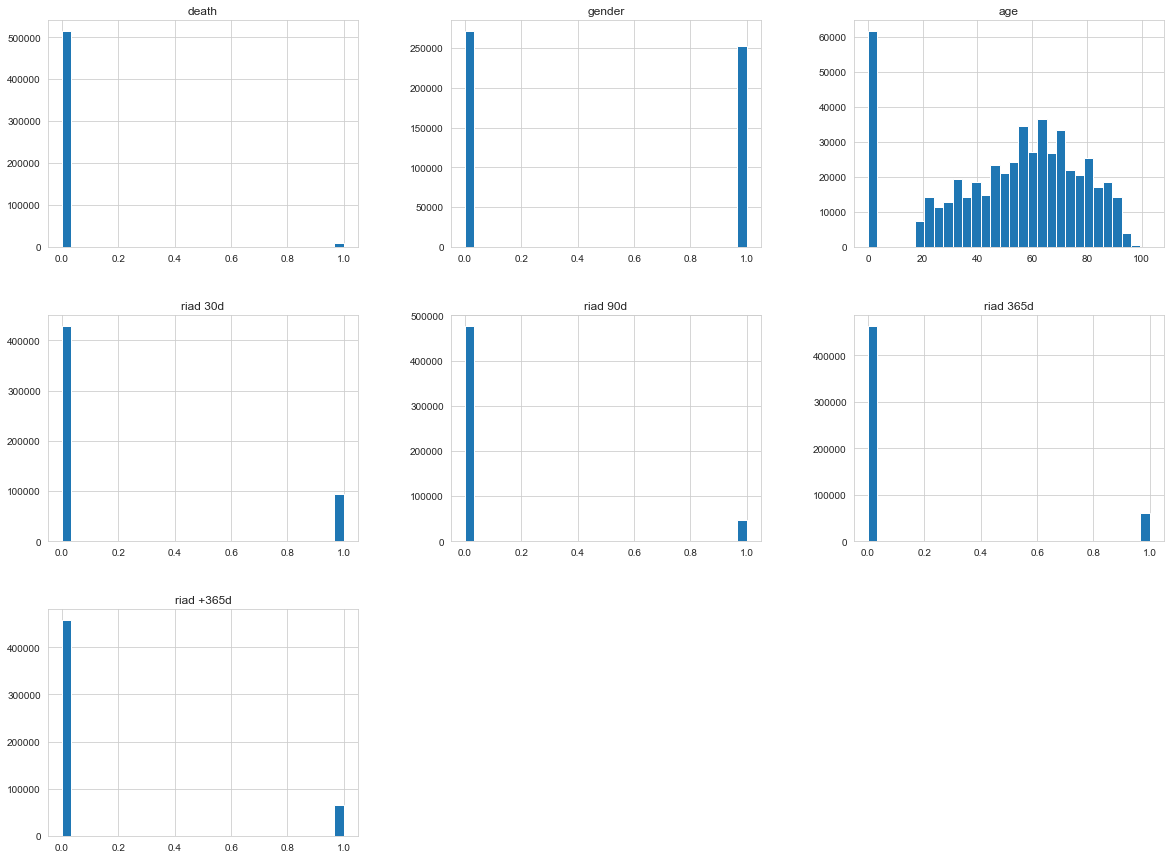

In [193]:
%matplotlib inline
draft.hist(bins=30, figsize=(20,15))
plt.show()

osservazioni:
- il dato riguardante le morti ospedaliere è decisamente sbilanciato
- il numero di osservazioni di genere femminile è leggermente superiore
- l'età media è influenzata dal grande numero di osservazioni di neonati (età 0)
- le riammissioni più frequenti sono quelle entro i 30 giorni

di seguito mostro come l'età media cambia una volta ignorate tutte le osservazioni di neonati

In [194]:
df_without_0age = draft[draft.age != 0]

In [195]:
età_media_nuova = df_without_0age.age.mean()
print("l'età media delle ammissioni una volta ignorati i neonati è di %d anni" % età_media_nuova)

l'età media delle ammissioni una volta ignorati i neonati è di 58 anni


In [196]:
print("includendo i neonati l'età media del dataset scende a %d" % draft.age.mean())

includendo i neonati l'età media del dataset scende a 51


## matrice di correlazione

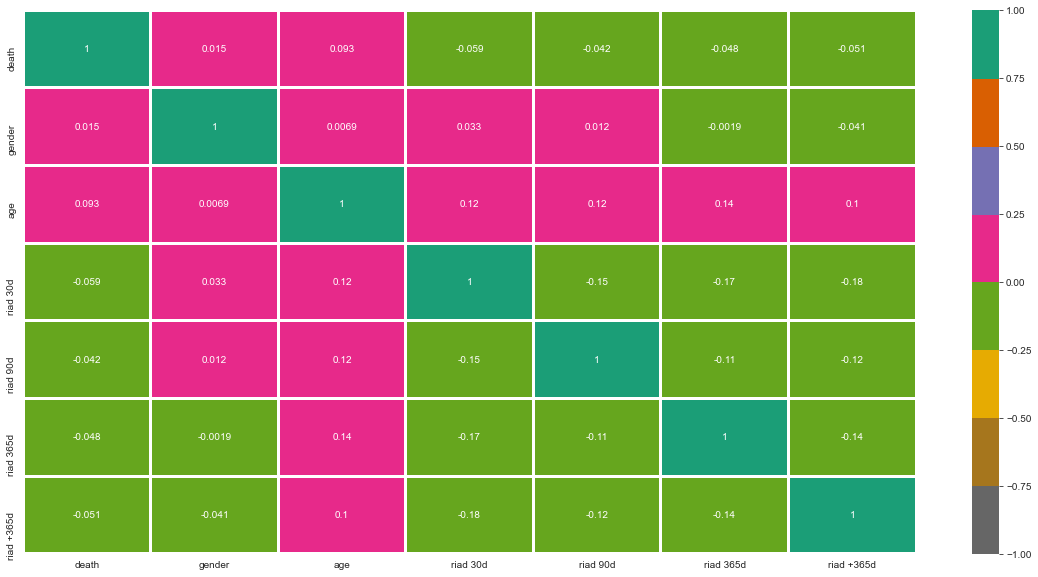

In [197]:
corr_matrix = draft.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap='Dark2_r', vmin=-1, linewidths=2)
plt.show()

dalla matrice di correlazione non risulta nessuna correlazione significativa tra le varie features che giustifichi
l'eliminazione di features fortemente correlate tra loro.

## focus sulle correlazioni con le possibili label
le label sono le features su cui si effettuerà una classificazione, ovvero *death*, *riad 30d*, *riad 90d*, *riad 365d*,
*riad +365d*

In [198]:
corr_matrix["death"].sort_values(ascending=False)

death         1.000000
age           0.092558
gender        0.014741
riad 90d     -0.042113
riad 365d    -0.048445
riad +365d   -0.051120
riad 30d     -0.059127
Name: death, dtype: float64

In [199]:
corr_matrix["riad 30d"].sort_values(ascending=False)

riad 30d      1.000000
age           0.115684
gender        0.032705
death        -0.059127
riad 90d     -0.146546
riad 365d    -0.168737
riad +365d   -0.177886
Name: riad 30d, dtype: float64

In [200]:
corr_matrix["riad 90d"].sort_values(ascending=False)

riad 90d      1.000000
age           0.116521
gender        0.012478
death        -0.042113
riad 365d    -0.112346
riad +365d   -0.118438
riad 30d     -0.146546
Name: riad 90d, dtype: float64

In [201]:
corr_matrix["riad 365d"].sort_values(ascending=False)

riad 365d     1.000000
age           0.140308
gender       -0.001893
death        -0.048445
riad 90d     -0.112346
riad +365d   -0.136373
riad 30d     -0.168737
Name: riad 365d, dtype: float64

In [202]:
corr_matrix["riad +365d"].sort_values(ascending=False)

riad +365d    1.000000
age           0.104708
gender       -0.040761
death        -0.051120
riad 90d     -0.118438
riad 365d    -0.136373
riad 30d     -0.177886
Name: riad +365d, dtype: float64

osserviamo che per tutte le label la variabile più positivamente correlata risulta essere l'età,
e il dato non sorprende considerando che tendenzialmente all'aumentare dell'età aumenta la probabilità
di morte ospedaliera. Tuttavia non si tratta di un dato molto significativo in quanto la correlazione sebbene posititva resta bassa.\
Per quanto riguarda le riammissioni, esse sono negativamente correlate con le altre label di ammissione, ad esempio:
le riammissioni entro 30 giorni sono negativamente correlate con le riammissioni entro 365 giorni, questo equivale a dire
che tendenzialmente è più probabile che le persone riammesse entro 30 giorni in ospedale non vengano poi riammesse entro i successivi 365 giorni. Anche in questo caso, non si tratta di una correlazione significativa.

## analisi sul gender vs death

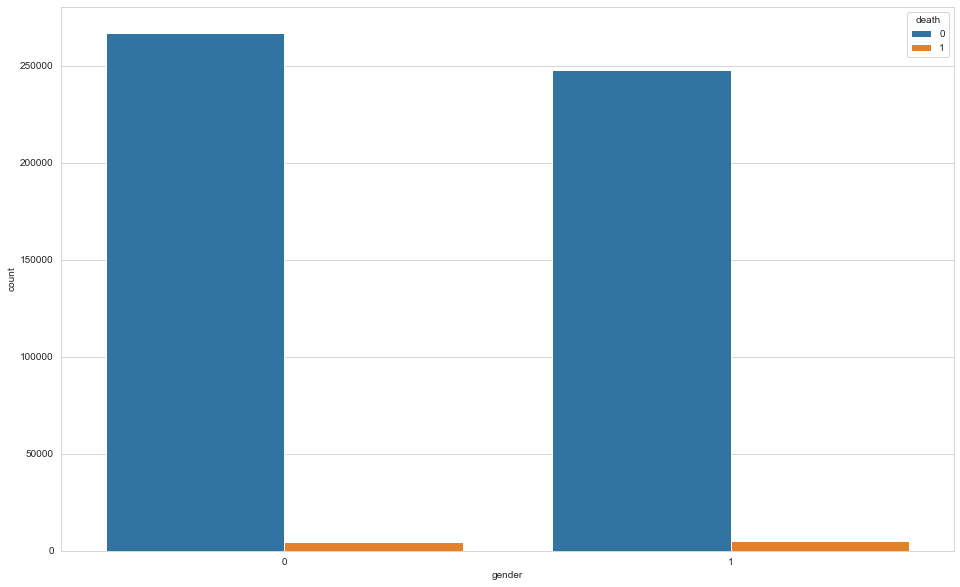

In [203]:
prof_fig = plt.gcf()
prof_fig.set_size_inches( 16, 10)
sns.countplot(data=draft, x='gender', hue='death');

gender 0 è donna mentre gender 1 è uomo\
si nota che le osservazioni femminili sono in maggioranza ma il numero di
morti è praticamente lo stesso

## spaccato del numero di morti ospedaliere per feature categorica

### admission type vs death

In [204]:
admtype_death = draft.groupby('admission_type').agg('sum')['death'].to_frame() 
admtype_death.reset_index(level=0, inplace=True)
admtype_death = admtype_death.sort_values('death', ascending=False)
admtype_death

,admission_type,death
5,EW EMER.,5499
8,URGENT,1754
6,OBSERVATION ADMIT,1131
1,DIRECT EMER.,438
3,ELECTIVE,293
7,SURGICAL SAME DAY ADMISSION,127
4,EU OBSERVATION,81
2,DIRECT OBSERVATION,26
0,AMBULATORY OBSERVATION,1


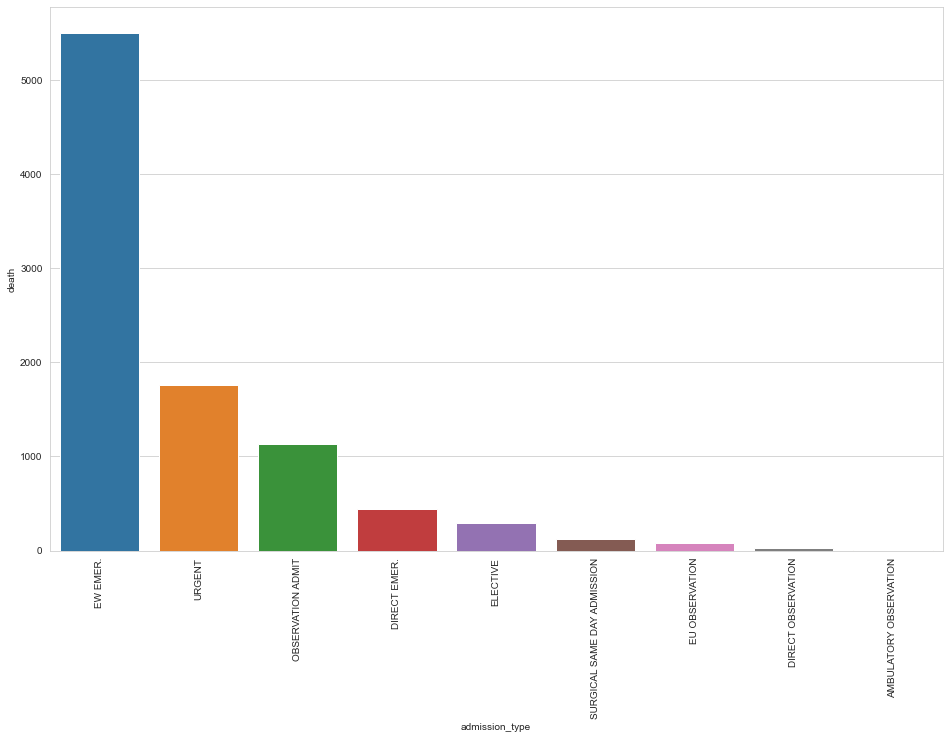

In [205]:
size_fig = plt.gcf()
size_fig.set_size_inches(16,10)
plt.xticks(rotation=90)
sns.barplot(x='admission_type', y='death', data=admtype_death);

In [206]:
draft.admission_type.value_counts()

EW EMER.                       157896
EU OBSERVATION                 100445
ELECTIVE                        72072
OBSERVATION ADMIT               55497
URGENT                          47930
SURGICAL SAME DAY ADMISSION     41074
DIRECT EMER.                    21581
DIRECT OBSERVATION              19991
AMBULATORY OBSERVATION           7254
Name: admission_type, dtype: int64

Le categorie più rappresentate sono EW EMER. e EU OBSERVATION ma il numero di morti è significativamente 
maggiore per la prima categoria\
Il numero di morti per la categoria URGENT è piuttosto alto se relazionato alla bassa rappresentazione di questa categoria

### admission location vs death

In [207]:
admloc_death = draft.groupby('admission_location').agg('sum')['death'].to_frame() 
admloc_death.reset_index(level=0, inplace=True)
admloc_death = admloc_death.sort_values('admission_location', ascending=False)
admloc_death

,admission_location,death
11,WALK-IN/SELF REFERRAL,182
10,TRANSFER FROM SKILLED NURSING FACILITY,277
9,TRANSFER FROM HOSPITAL,2181
8,PROCEDURE SITE,50
7,PHYSICIAN REFERRAL,988
6,PACU,38
5,NO DATA,211
4,INTERNAL TRANSFER TO OR FROM PSYCH,2
3,INFORMATION NOT AVAILABLE,37
2,EMERGENCY ROOM,5146


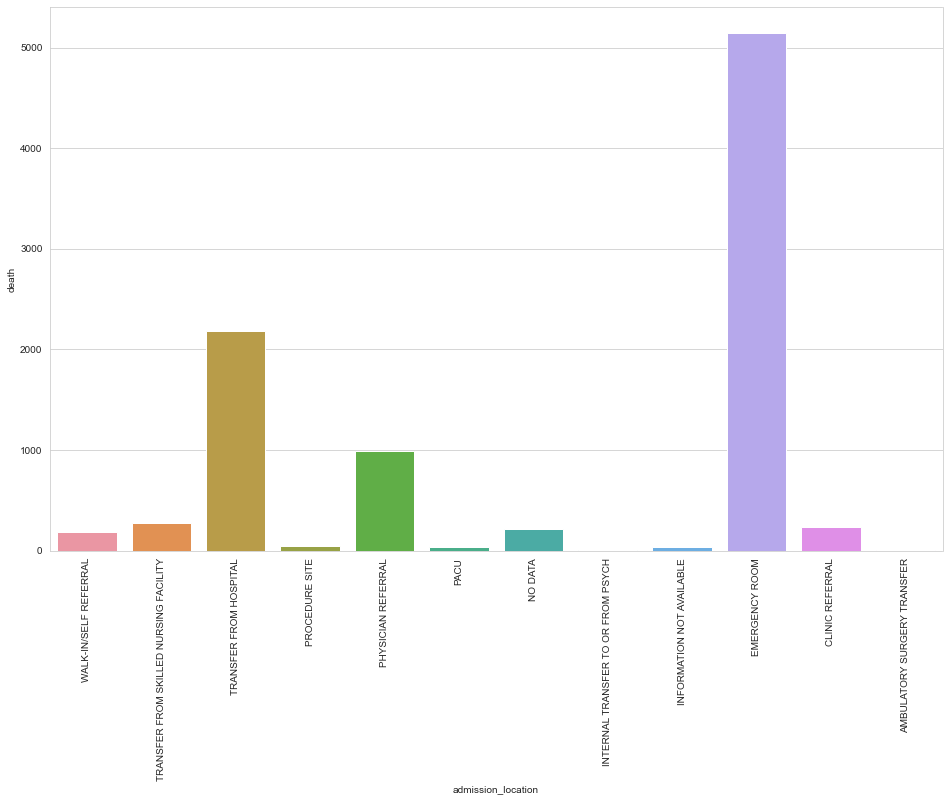

In [208]:
size_fig = plt.gcf()
size_fig.set_size_inches(16,10)
plt.xticks(rotation=90)
sns.barplot(x='admission_location', y='death', data=admloc_death);

### insurance vs death

In [209]:
ins_death = draft.groupby('insurance').agg('sum')['death'].to_frame() 
ins_death.reset_index(level=0, inplace=True)
ins_death = ins_death.sort_values('insurance', ascending=False)
ins_death

,insurance,death
2,Other,3811
1,Medicare,4995
0,Medicaid,544


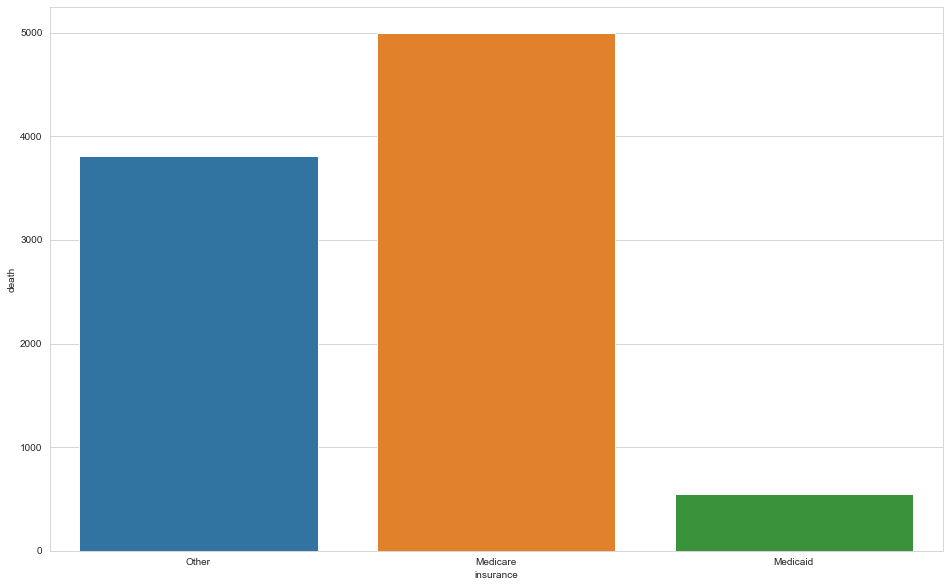

In [210]:
size_fig = plt.gcf()
size_fig.set_size_inches(16,10)
sns.barplot(x='insurance', y='death', data=ins_death);

In [211]:
draft.insurance.value_counts()

Other       301530
Medicare    171360
Medicaid     50850
Name: insurance, dtype: int64

nonostante Medicare non sia il tipo di assicurazione più rappresentato, è correlato
a un numero di morti maggiore rispetto a quello più rappresenteto (il generico Other)

### marital status vs death

In [212]:
marstatus_death = draft.groupby('marital_status').agg('sum')['death'].to_frame() 
marstatus_death.reset_index(level=0, inplace=True)
marstatus_death = marstatus_death.sort_values('marital_status', ascending=False)
marstatus_death

,marital_status,death
3,WIDOWED,1615
2,SINGLE,2649
1,MARRIED,4517
0,DIVORCED,569


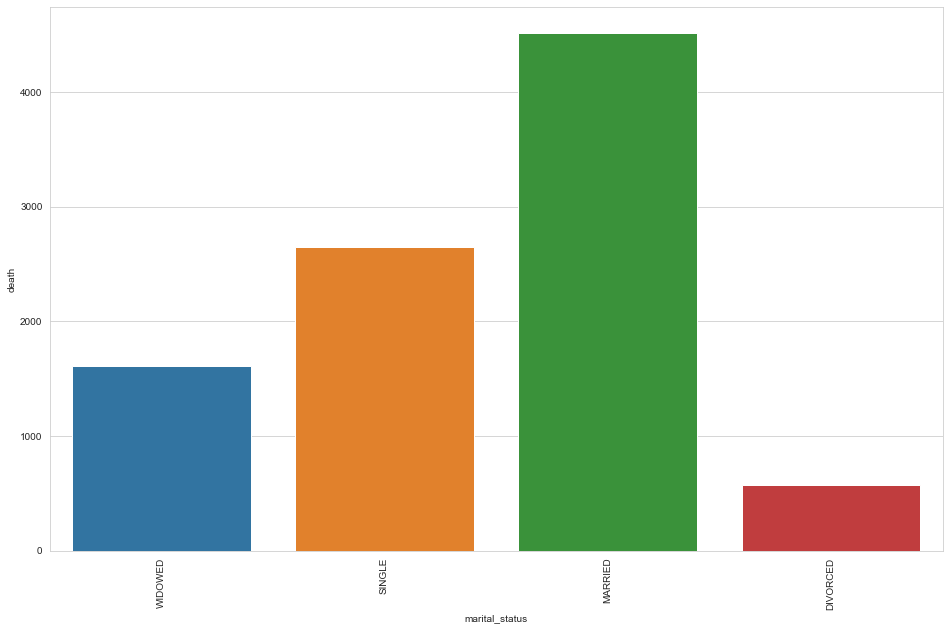

In [213]:
size_fig = plt.gcf()
size_fig.set_size_inches(16,10)
plt.xticks(rotation=90)
sns.barplot(x='marital_status', y='death', data=marstatus_death);

In [214]:
draft.marital_status.value_counts()

MARRIED     228277
SINGLE      212948
WIDOWED      48806
DIVORCED     33709
Name: marital_status, dtype: int64

il numero di morti è significamente maggiore tra individui sposati rispetto ad invididui single,
nonostante entrambe le categorie siano ugualmente rappresentate.\
Per quanto riguarda vedovi e divorziati, il numero di morti è significativamente maggiore tra i vedovi

### ethnicity vs death

In [215]:
etn_death = draft.groupby('ethnicity').agg('sum')['death'].to_frame() 
etn_death.reset_index(level=0, inplace=True)
etn_death = etn_death.sort_values('ethnicity', ascending=False)
etn_death

,ethnicity,death
6,WHITE,5976
5,UNKNOWN,1469
4,OTHER,382
3,HISPANIC/LATINO,262
2,BLACK/AFRICAN AMERICAN,901
1,ASIAN,343
0,AMERICAN INDIAN/ALASKA NATIVE,17


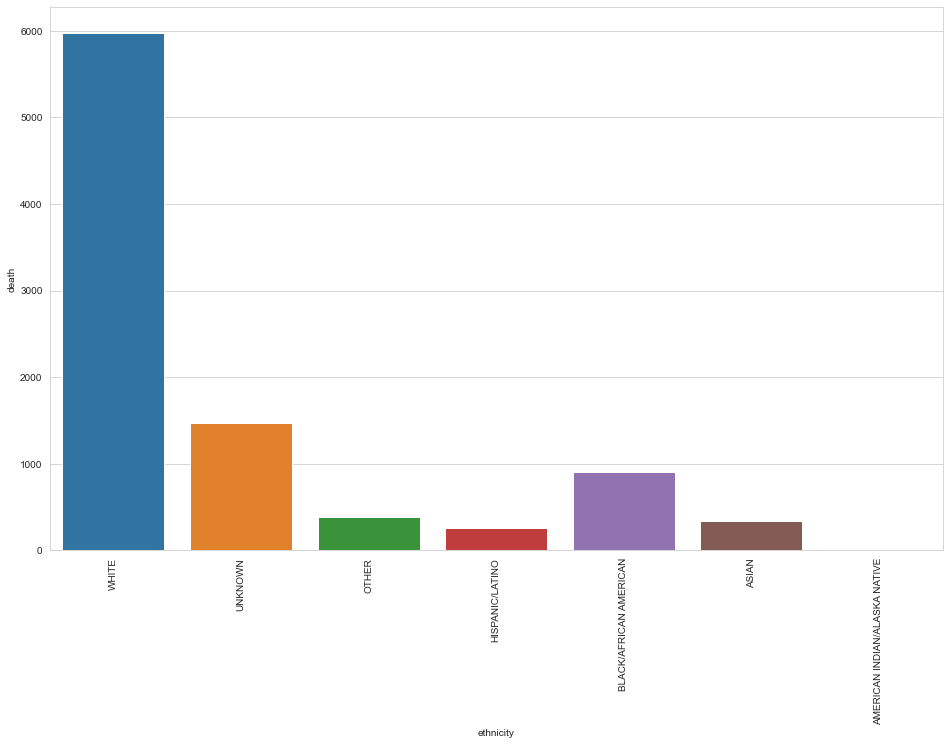

In [216]:
size_fig = plt.gcf()
size_fig.set_size_inches(16,10)
plt.xticks(rotation=90)
sns.barplot(x='ethnicity', y='death', data=etn_death);

In [217]:
draft.ethnicity.value_counts()

WHITE                            337630
BLACK/AFRICAN AMERICAN            80293
HISPANIC/LATINO                   29823
OTHER                             26813
ASIAN                             24506
UNKNOWN                           23140
AMERICAN INDIAN/ALASKA NATIVE      1535
Name: ethnicity, dtype: int64

quello che si può notare è un numero consistente di morti tra le osservazioni la cui etnia è sconosciuta.\
Infatti per queste osservazioni il numero di morti è più alto rispetto ad altre categorie più rappresentate
come ASIAN, OTHER, HISPANIC/LATINO E BLACK/AFRICAN AMERICAN.

## analisi più specifica su correlazione età-morte 

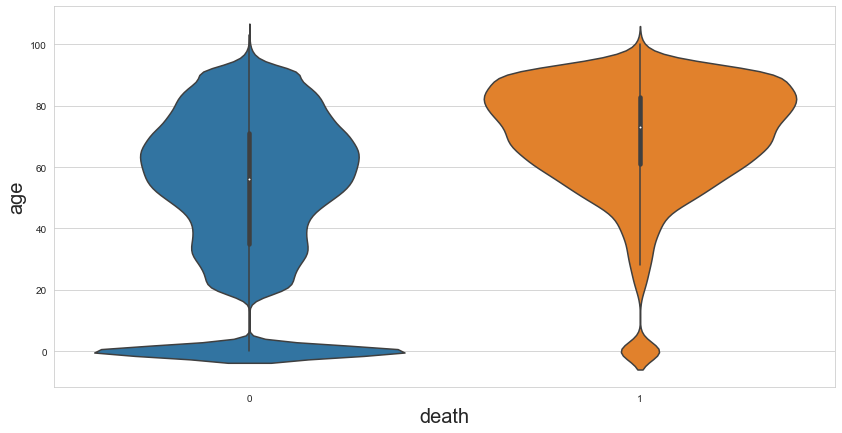

In [218]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
plt.xlabel('death', size=20)
plt.ylabel('age', size=20)
sns.violinplot(x='death', y='age', data=draft);

si può notare come l'età delle morti ospedaliere sia più concentrata intorno a valori tra 60 e 90 anni\
al di fuori di quel range di età le morti sono molto meno presenti. Ad esempio le morti sono quasi
inesistenti per osservazioni tra 1 e 20 anni, mentre piuttosto rare per osservazioni tra 20 e 40 anni.

Altro dato interessante è la presenza di morti ospedaliere di neonati

In [219]:
number_of_0age_deaths = len(draft.loc[(draft.age == 0) & (draft.death == 1)])
print("%d morti di neonati" % number_of_0age_deaths)

213 morti di neonati


## analisi età-riammissioni(30 giorni)

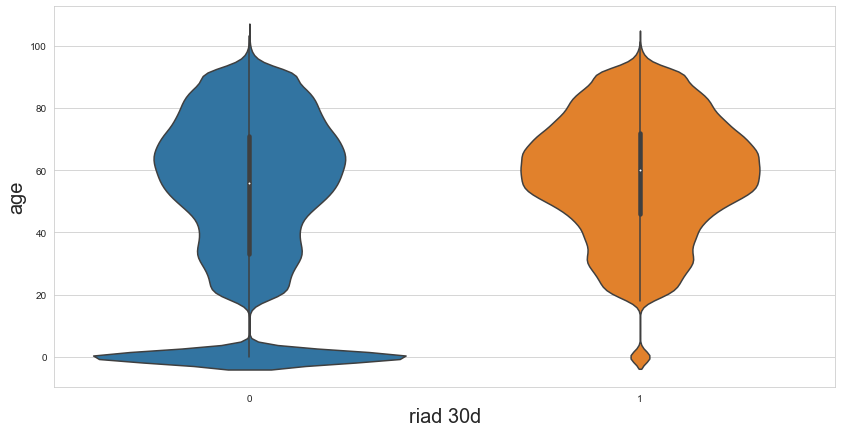

In [220]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
plt.xlabel('riad 30d', size=20)
plt.ylabel('age', size=20)
sns.violinplot(x='riad 30d', y='age', data=draft);

possiamo subito notare che rispetto all'analisi sul numero di morti, questa volta il range
di età che va tra i 20 e i 40 anni è ben rappresentato nelle riammissioni\
questo vuol dire che non è raro che persone tra 20 e 40 anni vengano riammesse entro 30 giorni in ospedale,
è raro invece che individui tra i 20 e i 40 anni muoiano in ospedale (grafico precedente).

## analisi età-riammissioni(90 giorni)

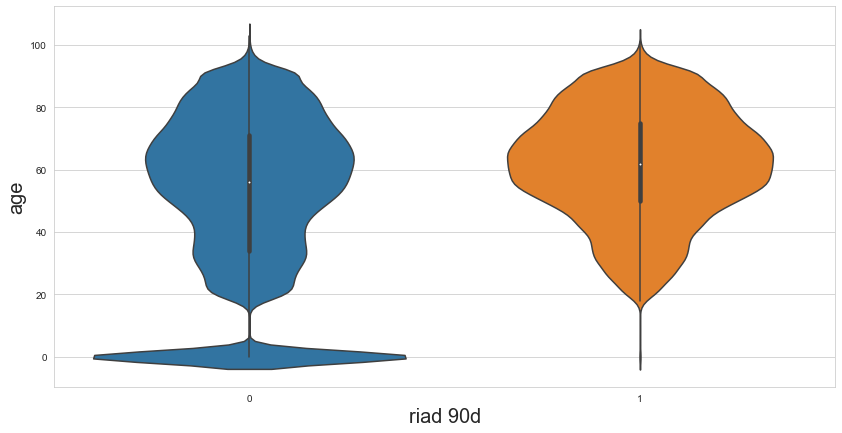

In [221]:
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
plt.xlabel('riad 90d', size=20)
plt.ylabel('age', size=20)
sns.violinplot(x='riad 90d', y='age', data=draft);

vediamo come la categoria di neonati già scompare per le riammissioni a 90 giorni.\
Questo ci fa capire che probabilmente le "riammissioni" di neonati in ospedale possano riferirsi
a trasferimenti da un reparto all'altro in concomitanza con problematiche legate al parto, quindi
ovviamente sicuramente entro 30 giorni.
Per il resto non si notano grandi differenze in termini di età.

## analisi più specifica tra età e possibili labels

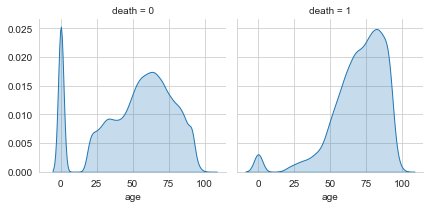

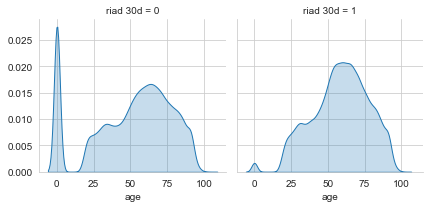

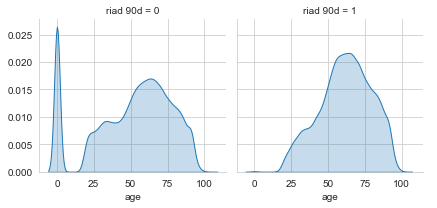

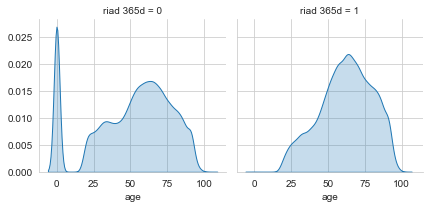

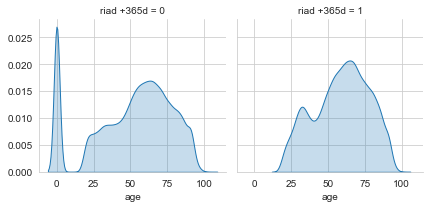

In [222]:
lookinto = ['death', 'riad 30d', 'riad 90d', 'riad 365d', 'riad +365d']

%matplotlib inline
for feature in lookinto:
    g = sns.FacetGrid(draft, col=feature, height=3)
    g.map(sns.kdeplot, "age", shade=True).add_legend()

I grafici precedenti confermano le osservazioni fatte finora.

Si può notare come nel primo grafico che riguarda le morti ospedaliere, la curva
relativa alle morti sia spostata verso destra, ovvero verso età comprese tra 60 e 90 anni.\
Nei grafici riguardanti le riammissioni, la curva si schiaccia e sposta verso sinistra, includendo
quindi più osservazioni con età più basse.

Anche il dato relativo alle riammissioni di neonati è confermato dai precedenti grafici: le riammissioni
di neonati sono più frequenti a breve distanza di tempo dal parto, per poi scomparire del tutto all'aumentare
dell'intervallo di tempo (es. neonati assenti nell'ultimo grafico delle riammissioni oltre 365 giorni)

L'analisi esplorativa mostra dati interessanti, tuttavia non c'è nessuna feature da cui la predizione
possa dipendere fortemente, è più probabile invece che la predizione dipenda da una combinazione delle diverse
features, per esempio *età* e *genere*

Per questo motivo aggiungeremo dati relativi alle diagnosi per ammissione, i quali possono dare informazioni
aggiuntive circa la situazione esistente al tempo dell'ammissione ospedaliera, andando a rafforzare quindi
la capacità dei modelli predittivi.

# MERGING admissions and diagnoses data

In [223]:
merged = pd.merge(admpat_to_merge, df_diag, how='left', left_on='hadm_id', right_on='hadm_id')

In [224]:
merged

,hadm_id,admission_type,admission_location,discharge_location,insurance,marital_status,ethnicity,death,gender,age,...,icd_D_circulatory,icd_D_skin,icd_D_mental,icd_D_morbidity_mortality_external,icd_D_ear,icd_D_eye,icd_D_injury_poisoning_external,icd_D_perinatal,seq_max,seq_mean
0,25058216,ELECTIVE,NO DATA,HOME,Other,MARRIED,WHITE,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.5
1,22595853,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,WHITE,0,0,52,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,4.5
2,22841357,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,WIDOWED,WHITE,0,0,52,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,4.5
3,29079034,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,WIDOWED,WHITE,0,0,52,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,13.0,7.0
4,25742920,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,WIDOWED,WHITE,0,0,52,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523735,29734428,EW EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,SINGLE,WHITE,0,0,46,...,4.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,22.0,11.5
523736,25744818,EW EMER.,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,SINGLE,WHITE,0,0,48,...,2.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,19.0,10.0
523737,26071774,EW EMER.,EMERGENCY ROOM,HOME,Other,WIDOWED,WHITE,0,1,58,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0
523738,21033226,EW EMER.,EMERGENCY ROOM,DIED,Other,WIDOWED,WHITE,1,1,58,...,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,6.5


Dopo il merge ci saranno osservazioni che non hanno dati per le features relative alle diagnosi
in quanto quel dataset contiene meno osservazioni rispetto al dataset delle ammissioni.\
Elimino quindi le osservazioni che non hanno dati per quelle features.

In [225]:
merged.dropna(inplace=True)

In [226]:
merged

,hadm_id,admission_type,admission_location,discharge_location,insurance,marital_status,ethnicity,death,gender,age,...,icd_D_circulatory,icd_D_skin,icd_D_mental,icd_D_morbidity_mortality_external,icd_D_ear,icd_D_eye,icd_D_injury_poisoning_external,icd_D_perinatal,seq_max,seq_mean
0,25058216,ELECTIVE,NO DATA,HOME,Other,MARRIED,WHITE,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.5
1,22595853,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,WHITE,0,0,52,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,4.5
2,22841357,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,WIDOWED,WHITE,0,0,52,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,4.5
3,29079034,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,WIDOWED,WHITE,0,0,52,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,13.0,7.0
4,25742920,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,WIDOWED,WHITE,0,0,52,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523735,29734428,EW EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,SINGLE,WHITE,0,0,46,...,4.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,22.0,11.5
523736,25744818,EW EMER.,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,SINGLE,WHITE,0,0,48,...,2.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,19.0,10.0
523737,26071774,EW EMER.,EMERGENCY ROOM,HOME,Other,WIDOWED,WHITE,0,1,58,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0
523738,21033226,EW EMER.,EMERGENCY ROOM,DIED,Other,WIDOWED,WHITE,1,1,58,...,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,6.5


controllo se ci siano ancora missing values

In [227]:
merged.isna().any().to_frame()

,0
hadm_id,False
admission_type,False
admission_location,False
discharge_location,False
insurance,False
marital_status,False
ethnicity,False
death,False
gender,False
age,False


non ci sono missing data.

posso a questo punto eliminare l'hadm_id su cui ho effettuato il merge

In [228]:
merged.drop(["hadm_id"], axis=1, inplace=True)

In [229]:
merged

,admission_type,admission_location,discharge_location,insurance,marital_status,ethnicity,death,gender,age,riad 30d,...,icd_D_circulatory,icd_D_skin,icd_D_mental,icd_D_morbidity_mortality_external,icd_D_ear,icd_D_eye,icd_D_injury_poisoning_external,icd_D_perinatal,seq_max,seq_mean
0,ELECTIVE,NO DATA,HOME,Other,MARRIED,WHITE,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.5
1,URGENT,TRANSFER FROM HOSPITAL,HOME,Other,WIDOWED,WHITE,0,0,52,0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,4.5
2,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,WIDOWED,WHITE,0,0,52,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,4.5
3,EW EMER.,EMERGENCY ROOM,HOME,Medicaid,WIDOWED,WHITE,0,0,52,1,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,13.0,7.0
4,EW EMER.,EMERGENCY ROOM,HOSPICE,Medicaid,WIDOWED,WHITE,0,0,52,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523735,EW EMER.,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,SINGLE,WHITE,0,0,46,0,...,4.0,0.0,2.0,2.0,0.0,0.0,2.0,0.0,22.0,11.5
523736,EW EMER.,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,SINGLE,WHITE,0,0,48,0,...,2.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,19.0,10.0
523737,EW EMER.,EMERGENCY ROOM,HOME,Other,WIDOWED,WHITE,0,1,58,0,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0
523738,EW EMER.,EMERGENCY ROOM,DIED,Other,WIDOWED,WHITE,1,1,58,0,...,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,6.5


# ONE-HOT ENCODING

utilizzo l'encoding con creazione di dummy variables per ridurre il numero di nuove dummy variables create 

In [230]:
merged_prepared = merged.copy()

In [231]:
merged_prepared = pd.get_dummies(merged_prepared, columns=['admission_type'], prefix='admT_', drop_first=True)
merged_prepared = pd.get_dummies(merged_prepared, columns=['admission_location'], prefix='admL_', drop_first=True)
merged_prepared = pd.get_dummies(merged_prepared, columns=['discharge_location'], prefix='disL_', drop_first=True)
merged_prepared = pd.get_dummies(merged_prepared, columns=['ethnicity'], prefix='ethn_', drop_first=True)
merged_prepared = pd.get_dummies(merged_prepared, columns=['insurance'], prefix='ins_', drop_first=True)
merged_prepared = pd.get_dummies(merged_prepared, columns=['marital_status'], prefix='maritalS_', drop_first=True)

In [232]:
merged_prepared

,death,gender,age,riad 30d,riad 90d,riad 365d,riad +365d,icd_D_blood,icd_D_health_status,icd_D_pregnancy,...,ethn__BLACK/AFRICAN AMERICAN,ethn__HISPANIC/LATINO,ethn__OTHER,ethn__UNKNOWN,ethn__WHITE,ins__Medicare,ins__Other,maritalS__MARRIED,maritalS__SINGLE,maritalS__WIDOWED
0,0,1,0,0,0,0,0,0.0,3.0,0.0,...,0,0,0,0,1,0,1,1,0,0
1,0,0,52,0,1,0,0,0.0,1.0,0.0,...,0,0,0,0,1,0,1,0,0,1
2,0,0,52,1,0,0,0,1.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,52,1,0,0,0,0.0,3.0,0.0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,52,0,0,0,0,0.0,2.0,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523735,0,0,46,0,0,0,1,1.0,4.0,0.0,...,0,0,0,0,1,0,1,0,1,0
523736,0,0,48,0,0,0,0,1.0,3.0,0.0,...,0,0,0,0,1,0,1,0,1,0
523737,0,1,58,0,1,0,0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,1
523738,1,1,58,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,1


da questo punto, ogni sezione sarà relativa a un tipo di classificazione, nello specifico:
- predizione dell'in-hospital mortality
- predizione delle riammissioni entro 30 giorni
- predizione delle riammissioni entro 90 giorni
- predizione delle riammissioni entro 365 giorni

I dati da utilizzare per un tipo di classificazione non saranno necessariamente gli stessi per l'altro tipo
di classificazione. Ad esempio, per classificare le morti ospedaliere, non utilizzeremo ovviamente i dati relativi alle
riammissioni nè quelli relativi al luogo di rilascio.

# CLASSIFICAZIONE *IN HOSPITAL MORTALITY*

nota: la dicitura *ihm* sta per in-hospital-mortality

In [233]:
df1 = merged_prepared.copy()

In [234]:
df1.to_csv('df1.csv', index=False)

dato che bisogna predire le morti ospedaliere, vado ad eliminare tutte le feature riguardanti
riammissioni e luoghi di rilascio, altrimenti non sarebbe necessaria una predizione per capire
se ci sia stata morte ospedaliera o meno

In [235]:
remove_for_ihm = [
'riad 30d', 'riad 90d',
'riad 365d', 'riad +365d','disL__AGAINST ADVICE',
'disL__ASSISTED LIVING',
'disL__CHRONIC/LONG TERM ACUTE CARE',
'disL__DIED',
'disL__HEALTHCARE FACILITY',
'disL__HOME',
'disL__HOME HEALTH CARE',
'disL__HOSPICE',
'disL__NO DATA',
'disL__OTHER FACILITY',
'disL__PSYCH FACILITY',
'disL__REHAB',
'disL__SKILLED NURSING FACILITY',
]

In [236]:
remove_for_ihm

['riad 30d',
 'riad 90d',
 'riad 365d',
 'riad +365d',
 'disL__AGAINST ADVICE',
 'disL__ASSISTED LIVING',
 'disL__CHRONIC/LONG TERM ACUTE CARE',
 'disL__DIED',
 'disL__HEALTHCARE FACILITY',
 'disL__HOME',
 'disL__HOME HEALTH CARE',
 'disL__HOSPICE',
 'disL__NO DATA',
 'disL__OTHER FACILITY',
 'disL__PSYCH FACILITY',
 'disL__REHAB',
 'disL__SKILLED NURSING FACILITY']

In [237]:
df1.drop(remove_for_ihm, axis=1, inplace=True)

In [238]:
df1

,death,gender,age,icd_D_blood,icd_D_health_status,icd_D_pregnancy,icd_D_abnormal,icd_D_chromosomal,icd_D_infectious_parasitic,icd_D_musculoskeletal,...,ethn__BLACK/AFRICAN AMERICAN,ethn__HISPANIC/LATINO,ethn__OTHER,ethn__UNKNOWN,ethn__WHITE,ins__Medicare,ins__Other,maritalS__MARRIED,maritalS__SINGLE,maritalS__WIDOWED
0,0,1,0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,1,0,0
1,0,0,52,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0,1,0,0,1
2,0,0,52,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,52,0.0,3.0,0.0,2.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,52,0.0,2.0,0.0,2.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523735,0,0,46,1.0,4.0,0.0,0.0,0.0,1.0,2.0,...,0,0,0,0,1,0,1,0,1,0
523736,0,0,48,1.0,3.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,1,0,1,0,1,0
523737,0,1,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,1
523738,1,1,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,0,1


## creo training set, validation set, test set

In [239]:
train, validate, test = np.split(df1.sample(frac=1, random_state=42), [int(.6*len(df1)), int(.7*len(df1))])

## separo le label dai predittori

In [240]:
X_train_ihm = train.drop(["death"], axis=1)

In [241]:
y_train_ihm = train["death"]

In [242]:
X_validate_ihm = validate.drop(["death"], axis=1)

In [243]:
y_validate_ihm = validate["death"]

In [244]:
X_test_ihm = test.drop(["death"], axis=1)

In [245]:
y_test_ihm = test["death"]

controllo che la stratificazione in base alla label sia andata a buon fine:

In [246]:
# proporzione di classi positive (death 1) nel training set
tot_pos_train = len(y_train_ihm[y_train_ihm == 1])
prop_pos_train = tot_pos_train / len(y_train_ihm) * 100

print('{} % di morti ospedaliere nel training set'.format(prop_pos_train))
print('{} % di sopravvissuti nel training set'.format(100 - prop_pos_train))

print()

# proporzione di classi negative (death 0) nel validate set
tot_pos_validate = len(y_validate_ihm[y_validate_ihm == 1])
prop_pos_validate = tot_pos_validate / len(y_validate_ihm) * 100

print('{} % di morti ospedaliere nel validate set'.format(prop_pos_validate))
print('{} % di sopravvissuti nel validate set'.format(100 - prop_pos_validate))

print()

# proporzione di classi negative (death 0) nel testing set
tot_pos_test = len(y_test_ihm[y_test_ihm == 1])
prop_pos_test = tot_pos_test / len(y_test_ihm) * 100

print('{} % di morti ospedaliere nel testing set'.format(prop_pos_test))
print('{} % di sopravvissuti nel testing set'.format(100 - prop_pos_test))

1.789769274561353 % di morti ospedaliere nel training set
98.21023072543865 % di sopravvissuti nel training set

1.790408934773848 % di morti ospedaliere nel validate set
98.20959106522615 % di sopravvissuti nel validate set

1.778255390736441 % di morti ospedaliere nel testing set
98.22174460926355 % di sopravvissuti nel testing set


### standardizzo le features che hanno diverse scale di valori

In [247]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_ihm_scaled = scaler.fit_transform(X_train_ihm)  # fitting and transforming training set
X_train_ihm_scaled

array([[-0.96512577, -0.75686884,  0.96630854, ..., -0.87639765,
         1.20523447, -0.32124958],
       [-0.96512577,  0.69621419, -0.51700569, ..., -0.87639765,
         1.20523447, -0.32124958],
       [ 1.03613439,  1.04036543, -0.51700569, ...,  1.14103456,
        -0.82971407, -0.32124958],
       ...,
       [-0.96512577, -0.5656737 , -0.51700569, ...,  1.14103456,
        -0.82971407, -0.32124958],
       [ 1.03613439,  0.35206295, -0.51700569, ...,  1.14103456,
        -0.82971407, -0.32124958],
       [-0.96512577, -1.17749813,  2.44962278, ..., -0.87639765,
         1.20523447, -0.32124958]])

al momento ho scalato soltanto il training set.\
Anche il testing set dovrà essere scalato prima di fare le predizioni finali,
tuttavia verrà scalato tramite il `transform()` anzichè `fit_transform()`

## Modelli di classificazione

In [248]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [249]:
models = [SGDClassifier, DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, MLPClassifier, SVC]
names = ['SGD Classifier', 'Decision Tree Classifier', 'RandomForestClassifier', 'Logistic Regressor', 'MLP Classifier', 'Support Vector Classifier']

In [250]:
from sklearn.metrics import accuracy_score

for i in range(len(models)):
    model = models[i](random_state=42)  # inizializzo il modello qui (non ancora addestrato)
    name = names[i] 
    model.fit(X_train_ihm_scaled, y_train_ihm) # qui addestro il modello sui dati
    y_pred_ihm = model.predict(X_train_ihm_scaled)
    print(f'accuracy of {name}: ',accuracy_score(y_pred_ihm, y_train_ihm))

accuracy of SGD Classifier:  0.9821023072543865
accuracy of Decision Tree Classifier:  0.9998368866458137
accuracy of RandomForestClassifier:  0.9998304900436888
accuracy of Logistic Regressor:  0.9814914317514536
accuracy of MLP Classifier:  0.9848592427702404
accuracy of Support Vector Classifier:  0.9825052931882584


In [251]:
models = [GaussianNB]
names = ['Gaussian NB']

In [252]:
for i in range(len(models)):
    model = models[i]()  # inizializzo il modello qui (non ancora addestrato)
    name = names[i] 
    model.fit(X_train_ihm_scaled, y_train_ihm) # qui addestro il modello sui dati
    y_pred_ihm = model.predict(X_train_ihm_scaled)
    print(f'accuracy of {name}: ',accuracy_score(y_pred_ihm, y_train_ihm))

accuracy of Gaussian NB:  0.745111396826006


osservazioni:
- per capire se ci sia stato *overfitting* sul training set, utilizzo la *cross validation* per addestrare il modello su una parte dei dati ed effettuare le predizioni su dati mai visti
- alcuni modelli non sembra valga la pena analizzarli oltre, l'svc è estremamente lento e successivamente analizzandolo in crossvalidation impiegherà anche ore nell'addestramento, mentre il Gaussian NB produce scarsi risultati già sul set di training 

In [253]:
models = [SGDClassifier, DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, MLPClassifier]
names = ['SGD Classifier', 'Decision Tree Classifier', 'RandomForestClassifier', 'Logistic Regressor', 'MLP Classifier']

## cross validation

In [88]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


names_cv = ['sgd_cv', 'dt_cv', 'rf_cv', 'lr_cv', 'mlp_cv']

for i in range(len(models)):
    avg_acc_models = []
    model = models[i](random_state=42)  # inizializzo il modello qui (non ancora addestrato)
    name = names[i] 
    acc_model = cross_val_score(model, X_train_ihm_scaled, y_train_ihm, cv=3, scoring='accuracy')
    avg_acc_model = acc_model.mean()
    avg_acc_models.append(avg_acc_model)
    print(f'accuracy of {name}: ', avg_acc_model)

accuracy of SGD Classifier:  0.9821023072543865
accuracy of Decision Tree Classifier:  0.9674540883882482
accuracy of RandomForestClassifier:  0.9820671259426993
accuracy of Logistic Regressor:  0.9814850351493286
accuracy of MLP Classifier:  0.9784114678282897


osservazioni:
- le performance sono elevate, ma bisogna tenere conto del fatto che il dataset è sbilanciato, quindi teoricamente se il modello predicessse sempre classe 0, raggiungerebbe performance elevate data la scarsità di osservazioni di tipo 1. Esamineremo questi aspetti per ogni modello

## analisi sui singoli modelli
procedo ad analizzarli uno per uno esaminando le predizioni fatte tramite cross validation\
questa volta utilizzo *5-fold cross validation* per ogni modello

**NOTA: la seguente analisi dei singoli modelli tramite cross validation ha lo scopo di mostrare
come la scarsità delle osservazioni sulle morti ospedaliere incida negativamente sulla capacità dei modelli
di fare predizioni corrette, portando i modelli a predire quasi esclusivamente la classe 0**

Al termine di questa analisi, verranno applicate tecniche di ***UNDERSAMLING*** ed ***OVERSAMPLING*** per mostrare
come rafforzare la capacità dei modelli predittivi

In [89]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

### analisi specifica su SGD Classifier

In [90]:
sgd_cv = SGDClassifier(random_state=42)
y_pred_sgd_cv = cross_val_predict(sgd_cv, X_train_ihm_scaled, y_train_ihm, cv=5)
score_sgd_cv = accuracy_score(y_train_ihm, y_pred_sgd_cv)

In [91]:
list(y_pred_sgd_cv).count(1)  # numero di predizioni di morti ospedaliere

0

In [92]:
score_sgd_cv

0.9821023072543865

### confusion matrix SGD

In [93]:
cm_ihm_sgd = confusion_matrix(y_train_ihm, y_pred_sgd_cv)
cm_ihm_sgd

array([[307070,      0],
       [  5596,      0]], dtype=int64)

In [94]:
print("PREDIZIONI STOCHASTIC GRADIENT DESCENT CON CROSS VALIDATION")
print("{} veri positivi".format(cm_ihm_sgd[1,1]))
print("{} veri negativi".format(cm_ihm_sgd[0,0]))
print("{} falsi positivi".format(cm_ihm_sgd[0,1]))
print("{} falsi negativi".format(cm_ihm_sgd[1,0]))

PREDIZIONI STOCHASTIC GRADIENT DESCENT CON CROSS VALIDATION
0 veri positivi
307070 veri negativi
0 falsi positivi
5596 falsi negativi


come anticipato, questo modello non predice mai morti ospedaliere, infatti i veri positivi risultano essere 0, così come i falsi positivi. In altre parole, sommando la colonna 2 della confusion matrix, quella relativa alle predizioni di morti ospedaliere,
otteniamo 0.

Detto questo, essendo le osservazioni di morti ospedaliere
molto rare, il modello ottiene comunque uno score di oltre 98%.\
Questo è un problema, che verrà risolto successivamente applicando tecniche di *oversampling* oppure *undersampling*

### analisi più specifica sul Random Forest Classifier

In [95]:
 rf_cv = RandomForestClassifier(random_state=42)
 y_pred_rf_cv = cross_val_predict(rf_cv, X_train_ihm_scaled, y_train_ihm, cv=5)
 score_rf_cv = accuracy_score(y_train_ihm, y_pred_rf_cv)

In [96]:
 list(y_pred_rf_cv).count(1)  # numero di predizioni di morti ospedaliere

84

In [97]:
 score_rf_cv

0.9820383412331369

### confusion matrix RF

In [98]:
 cm_ihm_rf = confusion_matrix(y_train_ihm, y_pred_rf_cv)
 cm_ihm_rf

array([[307018,     52],
       [  5564,     32]], dtype=int64)

In [99]:
 print("PREDIZIONI RANDOM FOREST CLASSIFIER CON CROSS VALIDATION")
 print("{} veri positivi".format(cm_ihm_rf[1,1]))
 print("{} veri negativi".format(cm_ihm_rf[0,0]))
 print("{} falsi positivi".format(cm_ihm_rf[0,1]))
 print("{} falsi negativi".format(cm_ihm_rf[1,0]))

PREDIZIONI RANDOM FOREST CLASSIFIER CON CROSS VALIDATION
32 veri positivi
307018 veri negativi
52 falsi positivi
5564 falsi negativi


In [100]:
ps_rf = precision_score(y_train_ihm, y_pred_rf_cv)
rs_rf = recall_score(y_train_ihm, y_pred_rf_cv)
f1_rf = f1_score(y_train_ihm, y_pred_rf_cv)

Rispetto al Stochastic gradient Descent, il Random Forest predice morti ospedaliere, ma comunque
molto poche

### analisi più specifica sul Logistic Regressor

In [101]:
lr_cv = LogisticRegression(random_state=42)
y_pred_lr_cv = cross_val_predict(lr_cv, X_train_ihm_scaled, y_train_ihm, cv=5)
score_lr_cv = accuracy_score(y_train_ihm, y_pred_lr_cv)

In [102]:
list(y_pred_lr_cv).count(1)  # numero di predizioni di morti ospedaliere

749

In [103]:
score_lr_cv

0.9814338623323291

### confusion matrix LR

In [104]:
cm_ihm_lr = confusion_matrix(y_train_ihm, y_pred_lr_cv)
cm_ihm_lr

array([[306591,    479],
       [  5326,    270]], dtype=int64)

In [105]:
print("PREDIZIONI LOGISTIC REGRESSOR CON CROSS VALIDATION")
print("{} veri positivi".format(cm_ihm_lr[1,1]))
print("{} veri negativi".format(cm_ihm_lr[0,0]))
print("{} falsi positivi".format(cm_ihm_lr[0,1]))
print("{} falsi negativi".format(cm_ihm_lr[1,0]))

PREDIZIONI LOGISTIC REGRESSOR CON CROSS VALIDATION
270 veri positivi
306591 veri negativi
479 falsi positivi
5326 falsi negativi


Il Logistic Regressor è il modello predice diverse morti ospedaliere (sempre un numero basso), tuttavia
le predizioni di morti ospedaliere sbagliate sono maggiori rispetto a quelle esatte

In [106]:
ps_lr = precision_score(y_train_ihm, y_pred_lr_cv)
rs_lr = recall_score(y_train_ihm, y_pred_lr_cv)
f1_lr = f1_score(y_train_ihm, y_pred_lr_cv)
print('precision score is {}'.format(ps_lr))
print('recall score is {}'.format(rs_lr))
print('f1 score is {}'.format(f1_lr))

precision score is 0.3604806408544726
recall score is 0.048248749106504646
f1 score is 0.08510638297872339


dato che il modello predice un numero più elevato di morti ospedaliere, procedo a calcolare precision, recall ed f1 score
per mostrare come le performance siano molto basse nonostante l'accuracy score possa far pensare a buone performance

### precision, recall, f1 del Logistic Regressor

In [107]:
ps_lr = precision_score(y_train_ihm, y_pred_lr_cv)
rs_lr = recall_score(y_train_ihm, y_pred_lr_cv)
f1_lr = f1_score(y_train_ihm, y_pred_lr_cv)
print('precision score is {}'.format(ps_lr))
print('recall score is {}'.format(rs_lr))
print('f1 score is {}'.format(f1_lr))

precision score is 0.3604806408544726
recall score is 0.048248749106504646
f1 score is 0.08510638297872339


si nota come l'f1 score, che è una media tra i precision e recall, sia bassissimo

### analisi più specifica sul Decision Tree

In [108]:
dt_cv = DecisionTreeClassifier(random_state=42)
y_pred_dt_cv = cross_val_predict(dt_cv, X_train_ihm_scaled, y_train_ihm, cv=5)
score_dt_cv = accuracy_score(y_train_ihm, y_pred_dt_cv)

In [109]:
score_dt_cv

0.9679626182571818

### confusion matrix DT

In [110]:
cm_ihm_dt = confusion_matrix(y_train_ihm, y_pred_dt_cv)
cm_ihm_dt

array([[301640,   5430],
       [  4587,   1009]], dtype=int64)

In [111]:
print("PREDIZIONI DECISION TREE CON CROSS VALIDATION")
print("{} veri positivi".format(cm_ihm_dt[1,1]))
print("{} veri negativi".format(cm_ihm_dt[0,0]))
print("{} falsi positivi".format(cm_ihm_dt[0,1]))
print("{} falsi negativi".format(cm_ihm_dt[1,0]))

PREDIZIONI DECISION TREE CON CROSS VALIDATION
1009 veri positivi
301640 veri negativi
5430 falsi positivi
4587 falsi negativi


Il Decision Tree è il modello che predice più morti ospedaliere, tuttavia maggior parte di esse sono sbagliate. 

il numero di falsi positivi, ovvero di predizioni inesatte di morti ospedaliere, è piuttosto alto\
il modello riesce a predire correttamente una bassa percentuale morti ospedaliere

per confermare la performance bassa del modello, calcolo precision, recall, f1 score

### precision, recall, f1 del Decision Tree

In [112]:
ps_dt = precision_score(y_train_ihm, y_pred_dt_cv)
rs_dt = recall_score(y_train_ihm, y_pred_dt_cv)
f1_dt = f1_score(y_train_ihm, y_pred_dt_cv)
print('precision score is {}'.format(ps_dt))
print('recall score is {}'.format(rs_dt))
print('f1 score is {}'.format(f1_dt))

precision score is 0.1567013511414816
recall score is 0.18030736240171552
f1 score is 0.1676776069796427


### analisi più specifica sul Multilayer Perceptron

In [113]:
mlp_cv = MLPClassifier(random_state=42)
y_pred_mlp_cv = cross_val_predict(mlp_cv, X_train_ihm_scaled, y_train_ihm, cv=5)
score_mlp_cv = accuracy_score(y_train_ihm, y_pred_mlp_cv)

In [114]:
score_mlp_cv

0.9795084850927187

### confusion matrix MLP

In [115]:
cm_ihm_mlp = confusion_matrix(y_train_ihm, y_pred_mlp_cv)
cm_ihm_mlp

array([[305530,   1540],
       [  4867,    729]], dtype=int64)

In [116]:
print("PREDIZIONI DECISION TREE CON CROSS VALIDATION")
print("{} veri positivi".format(cm_ihm_mlp[1,1]))
print("{} veri negativi".format(cm_ihm_mlp[0,0]))
print("{} falsi positivi".format(cm_ihm_mlp[0,1]))
print("{} falsi negativi".format(cm_ihm_mlp[1,0]))

PREDIZIONI DECISION TREE CON CROSS VALIDATION
729 veri positivi
305530 veri negativi
1540 falsi positivi
4867 falsi negativi


Il Decision Tree è il modello che predice più morti ospedaliere, tuttavia maggior parte di esse sono sbagliate. 

il numero di falsi positivi, ovvero di predizioni inesatte di morti ospedaliere, è piuttosto alto\
il modello riesce a predire correttamente una bassa percentuale morti ospedaliere

per confermare la performance bassa del modello, calcolo precision, recall, f1 score

### precision, recall, f1 del Multilayer Perceptron

In [117]:
ps_mlp = precision_score(y_train_ihm, y_pred_mlp_cv)
rs_mlp = recall_score(y_train_ihm, y_pred_mlp_cv)
f1_mlp = f1_score(y_train_ihm, y_pred_mlp_cv)
print('precision score is {}'.format(ps_mlp))
print('recall score is {}'.format(rs_mlp))
print('f1 score is {}'.format(f1_mlp))

precision score is 0.3212869105332746
recall score is 0.13027162258756256
f1 score is 0.18537825810553082


dopo aver effettuato l'analisi sulle performance del modello con l'attuale dataset, si traggono le seguenti conclusioni:

- essendo il dataset molto sbilanciato relativamente alla feature da classificare, l'analisi non può basarsi sull'accuracy score, in quanto questo dato può essere fuorviante dal momento che i modelli tendono a ottenere apparentemente buone performance ma soltanto perchè essi predicono quasi esclusivamente la classe abbondante (sopravvissuti)
- al contrario, la performance del modello deve essere misurata in base a **precision**, **recall** e **f1 score**
- occorre applicare tecniche di ***undersampling*** della classe abbondante oppure di ***oversampling*** della classe rara, scegliendo tra le due quella che incerementa maggiormente le performance 

## problema: il dataset è sbilanciato
i dati relativi alle morti ospedaliere sono troppo pochi (1% circa)\
una possibile soluzione è praticare un oversampling dei dati scarsi a disposizione attualmente oppure un undersampling dei dati abbondanti

## OVERSAMPLING
utilizzo la tecnica SMOTE (*Synthetic Minority Oversampling TEchnique*) che va ad incrementare il numero
di osservazioni relative alla classe sotto-rappresentata

In [118]:
from imblearn.over_sampling import SMOTE

In [119]:
eq = SMOTE()
X_train_ihm_ov, y_train_ihm_ov = eq.fit_resample(X_train_ihm_scaled, y_train_ihm.ravel())  # reshape 1D flatten

**NOTA**: l'oversampling viene applicato esclusivamente ai dati di training. Quindi ogni modello verrà ora addestrato
sul training set a cui ho aggiunto la dicitura *_ov*

### cosa succede dopo l'oversampling?

In [120]:
len(X_train_ihm_ov)  # nuova lunghezza del dataset

614140

In [121]:
list(y_train_ihm).count(1) # numero di morti ospedaliere PRIMA dell'oversampling

5596

In [122]:
list(y_train_ihm_ov).count(1) # numero di morti ospedaliere DOPO l'oversampling

307070

In [123]:
list(y_train_ihm).count(0) # numero di sopravvissuti PRIMA dell'oversampling

307070

In [124]:
list(y_train_ihm_ov).count(0) # numero di sopravvissuti DOPO l'oversampling

307070

l'oversampling prende la classe meno rappresentata, in questo caso morti ospedaliere,
e porta il numero di osservazioni allo stesso livello della classe più rappresentata

### note su Precision, Recall, F1 Score
il Precision score ci dice quante predizioni di morti ospedaliere siano effettivamente morti ospedaliere (quanto è stato preciso il modello nelle sue predizioni di morti ospedaliere)

il Recall score ci informa invece sull'abilità del modello di rilevare le morti ospedaliere presenti tra i dati (quante morti ospedaliere presenti è riuscito a rilevare)

## Nuove Predizioni POST oversampling

### Decision Tree

In [125]:
dt = DecisionTreeClassifier(random_state=42)

In [126]:
y_pred_dt_cv_ov = cross_val_predict(dt, X_train_ihm_ov, y_train_ihm_ov, cv=3)
score_dt_ov = accuracy_score(y_train_ihm_ov, y_pred_dt_cv_ov)

In [127]:
score_dt_ov

0.9807503175171784

In [128]:
cm_dt_ov = confusion_matrix(y_train_ihm_ov, y_pred_dt_cv_ov)
ps_dt_ov = precision_score(y_train_ihm_ov, y_pred_dt_cv_ov)
rs_dt_ov = recall_score(y_train_ihm_ov, y_pred_dt_cv_ov)
f1_dt_ov = f1_score(y_train_ihm_ov, y_pred_dt_cv_ov)

In [129]:
perf_dt = {'Metric': ['precision','recall','f1'],
        'pre-oversampling': [ps_dt,rs_dt,f1_dt],
        'post-oversampling': [ps_dt_ov, rs_dt_ov, f1_dt_ov]
        }

In [130]:
table_dt = pd.DataFrame(perf_dt, columns = ['Metric', 'pre-oversampling', 'post-oversampling'])
table_dt.style.set_table_attributes("style='display:inline'").set_caption('DECISION TREE PERFORMANCES')

,Metric,pre-oversampling,post-oversampling
0,precision,0.156701,0.979165
1,recall,0.180307,0.982405
2,f1,0.167678,0.980782


vediamo come la performance offerta del Decision Tree Classifier sia significativamente cresciuta dopo l'oversampling, con percentuali di precisione e recall molto alte, che si riflettono in un f1 score altrettanto alto

### Logistic Regressor

In [131]:
lr = LogisticRegression(random_state=42)

In [132]:
y_pred_lr_cv_ov = cross_val_predict(lr, X_train_ihm_ov, y_train_ihm_ov, cv=3)
score_lr_ov = accuracy_score(y_train_ihm_ov, y_pred_lr_cv_ov)

In [133]:
score_lr_ov

0.8584573550004885

In [134]:
cm_lr_ov = confusion_matrix(y_train_ihm_ov, y_pred_lr_cv_ov)
ps_lr_ov = precision_score(y_train_ihm_ov, y_pred_lr_cv_ov)
rs_lr_ov = recall_score(y_train_ihm_ov, y_pred_lr_cv_ov)
f1_lr_ov = f1_score(y_train_ihm_ov, y_pred_lr_cv_ov)

In [135]:
perf_lr = {'Metric': ['precision','recall','f1'],
        'pre-oversampling': [ps_lr,rs_lr,f1_lr],
        'post-oversampling': [ps_lr_ov, rs_lr_ov, f1_lr_ov]
        }

In [136]:
table_lr = pd.DataFrame(perf_lr, columns = ['Metric', 'pre-oversampling', 'post-oversampling'])
table_lr.style.set_table_attributes("style='display:inline'").set_caption('LOGISTIC REGRESSION PERFORMANCES')

,Metric,pre-oversampling,post-oversampling
0,precision,0.360481,0.843074
1,recall,0.048249,0.880877
2,f1,0.085106,0.861561


anche nel caso del Logistic Regressor le performance sono nettamente cresciute, tuttavia sono significativamente più basse rispetto al Decision Tree. Possiamo quindi escludere questo modello per le predizioni finali

### Multilayer Perceptron

In [137]:
mlp = MLPClassifier(random_state=42)

In [138]:
y_pred_mlp_cv_ov = cross_val_predict(mlp, X_train_ihm_ov, y_train_ihm_ov, cv=3)
score_mlp_ov = accuracy_score(y_train_ihm_ov, y_pred_mlp_cv_ov)

In [139]:
score_mlp_ov

0.9604699254241704

In [140]:
cm_mlp_ov = confusion_matrix(y_train_ihm_ov, y_pred_mlp_cv_ov)
ps_mlp_ov = precision_score(y_train_ihm_ov, y_pred_mlp_cv_ov)
rs_mlp_ov = recall_score(y_train_ihm_ov, y_pred_mlp_cv_ov)
f1_mlp_ov = f1_score(y_train_ihm_ov, y_pred_mlp_cv_ov)

In [141]:
perf_mlp = {'Metric': ['precision','recall','f1'],
        'pre-oversampling': [ps_mlp,rs_mlp,f1_mlp],
        'post-oversampling': [ps_mlp_ov, rs_mlp_ov, f1_mlp_ov]
        }

In [142]:
table_mlp = pd.DataFrame(perf_mlp, columns = ['Metric', 'pre-oversampling', 'post-oversampling'])
table_mlp.style.set_table_attributes("style='display:inline'").set_caption('MULTILAYER PERCEPTRON PERFORMANCES')

,Metric,pre-oversampling,post-oversampling
0,precision,0.321287,0.954951
1,recall,0.130272,0.966535
2,f1,0.185378,0.960708


anche nel caso del Logistic Regressor le performance sono nettamente cresciute, tuttavia sono significativamente più basse rispetto al Decision Tree. Possiamo quindi escludere questo modello per le predizioni finali

### Random Forest

In [143]:
rf = RandomForestClassifier(random_state=42)

In [144]:
y_pred_rf_cv_ov = cross_val_predict(rf, X_train_ihm_ov, y_train_ihm_ov, cv=3)
score_rf_ov = accuracy_score(y_train_ihm_ov, y_pred_rf_cv_ov)

In [145]:
score_rf_ov

0.9911762790243267

In [146]:
cm_rf_ov = confusion_matrix(y_train_ihm_ov, y_pred_rf_cv_ov)
ps_rf_ov = precision_score(y_train_ihm_ov, y_pred_rf_cv_ov)
rs_rf_ov = recall_score(y_train_ihm_ov, y_pred_rf_cv_ov)
f1_rf_ov = f1_score(y_train_ihm_ov, y_pred_rf_cv_ov)

In [147]:
perf_rf = {'Metric': ['precision','recall','f1'],
        'pre-oversampling': [ps_rf,rs_rf,f1_rf],
        'post-oversampling': [ps_rf_ov, rs_rf_ov, f1_rf_ov]
        }

In [148]:
table_rf = pd.DataFrame(perf_rf, columns = ['Metric', 'pre-oversampling', 'post-oversampling'])
table_rf.style.set_table_attributes("style='display:inline'").set_caption('RANDOM FOREST PERFORMANCES')

,Metric,pre-oversampling,post-oversampling
0,precision,0.380952,0.996586
1,recall,0.005718,0.985730
2,f1,0.011268,0.991128


**Random Forest è il modello che apparnetemente performa meglio dopo l'oversampling** con un **f1 score di oltre 99%**

## PRECISION RECALL TRADE-OFF
vado a focalizzarmi sui modelli più promettenti, quindi Random Forest, per approfondire l'analisi sul trade off
tra precision e recall, così come sullla curva ROC e la performance AUC score

In [149]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [150]:
y_probas_rf = cross_val_predict(rf, X_train_ihm_ov, y_train_ihm_ov, cv=3, method='predict_proba')
y_probas_rf = y_probas_rf[:,1]  # prelevo la seconda colonna che corrisponde alle probabilità di appartenenza alla classe 1

creo un grafico con le due curve di precision e recall relazionate al threshold\
al variare del threshold, precision e recall cambiano.\
Il threshold è la soglia che stabilisce il limite di probabilità dopo il quale l'osservazione viene considerata
come appartenente alla classe 1, nel nostro caso è il limite di probabilità che sancisce quando un'osservazione
verrà predetta come morte ospedaliera.\
Ad esempio, se la probabilità restituita da quella osservazione è 0.55 ma il threshold scelto è 0.6, quell'osservazione
non verrà predetta come morte ospedaliera, se invece il threshold è 0.5, allora verrà predetta come morte ospedaliera.

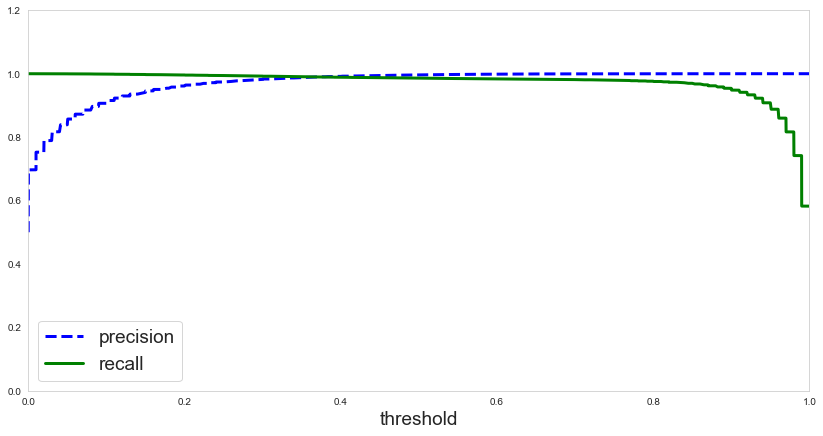

In [151]:
precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train_ihm_ov, y_probas_rf)

def plot_precision_and_recall(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision', linewidth=3)
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall', linewidth=3)
    plt.xlabel('threshold', fontsize=19)
    plt.legend(loc='lower left', fontsize=19)
    plt.axis([0,1,0,1.2])
    plt.grid()
    
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precisions_rf, recalls_rf, thresholds_rf)
plt.show()

ad esempio, se il threshold fosse minore di 0.2, la precision inizierebbe via via a scendere, ovvero il modello
inizierebbe a predire più frequentemente morti ospedaliere per osservazioni che in realtà si riferiscono a sopravvissuti.\
Se invece il threshold scelto fosse al di sopra di 0.6, la recall inizierebbe lentamente a scendere, per poi calare rapidamente
per threshold superiori a 0.8, perchè threshold così alti porterebbero il modello a predire quasi mai morti ospedaliere.

La scelta di un threshold piuttosto che un altro dipende molto dal tipo di problema affrontato:
- è più importante avere un'alta precision oppure un'alta recall?

Nel nostro caso equivarrebbe a chiedersi se sia più importante la predizione corretta delle morti ospedaliere oppure la predizione corretta dei sopravvissuti.\
Il modello sembra performare molto bene, per cui non andremo a modificare la scelta del threshold.

## ROC CURVE & ROC AUC SCORE
il seguente grafico offre informazioni molto rilevanti circa la performance del modello.\
La potenza del modello è data dal ROC AUC Score, che equivale all'area sottostante la curva blu.
Quindi, più la curva mira verso l'angolo in alto a sinistra, più il modello è potente\
Se la curva giacesse lungo la diagonale tratteggiata, il modello avrebbe un'area di 0.5 e sarebbe
un modello che effettua predizioni "random"

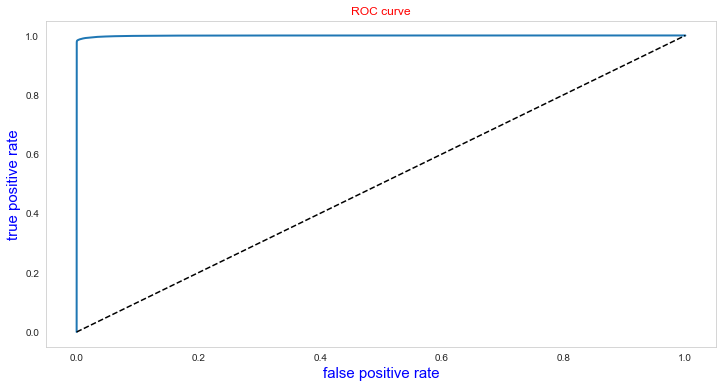

In [152]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_train_ihm_ov, y_probas_rf)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # dashed diagonal
    plt.grid(linestyle='--')
    plt.title("ROC curve", color='red')
    plt.xlabel("false positive rate", color='blue', size=15)
    plt.ylabel("true positive rate", color='blue', size=15)
    
plt.figure(figsize=(12, 6))                                   
plot_roc_curve(fpr_rf, tpr_rf)
plt.show()

In [153]:
roc_auc_rf = roc_auc_score(y_train_ihm_ov, y_probas_rf)
roc_auc_rf

0.9994010838136466

Dal grafico vediamo come il modello Random Forest addestrato appare molto performante, in quanto la curva è spostata verso l'angolo
superiore sinistro, andando quasi a toccarlo.\
Il ROC AUC score che misura l'area sottostante è infatti di 0.999

## HYPERPARAMETERS TUNING
andiamo a effettuare l'hyperparameter tuning dei due modelli più performanti

### Random Forest

#### tuning del n_estimators (default = 100)

In [140]:
from sklearn.model_selection import validation_curve

In [141]:
num_est = [1, 10, 50, 100]

In [142]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train_ihm_ov, y = y_train_ihm_ov, 
                                param_name = 'n_estimators', 
                                param_range = num_est, cv = 3)

In [143]:
train_scoreNum

array([[0.99300728, 0.98694761, 0.98776094],
       [0.99985101, 0.99886427, 0.99877145],
       [0.99988032, 0.99980705, 0.99981437],
       [0.99988032, 0.99981437, 0.99981926]])

In [144]:
test_scoreNum

array([[0.96318278, 0.97177512, 0.97429084],
       [0.97634749, 0.99719607, 0.99702999],
       [0.97793996, 0.99788484, 0.99777249],
       [0.97804254, 0.99791904, 0.99775295]])

In [145]:
avg_train_scoreNum = np.average(train_scoreNum, axis=1)

In [146]:
avg_test_scoreNum = np.average(test_scoreNum, axis=1)

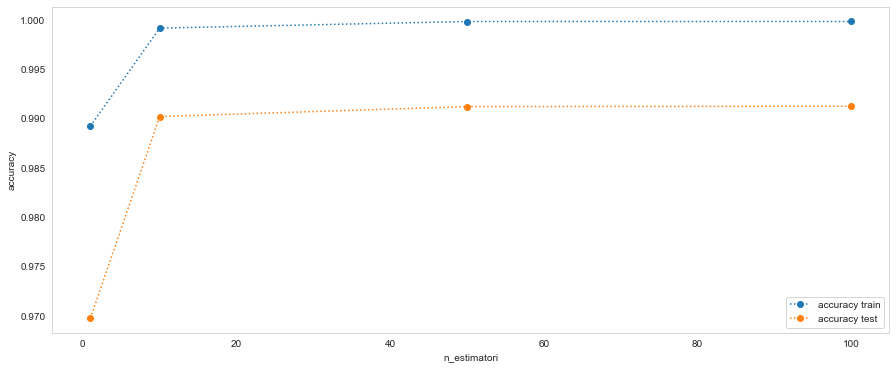

In [147]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(num_est,avg_train_scoreNum, 'o:', label='accuracy train')
ax.plot(num_est,avg_test_scoreNum, 'o:', label='accuracy test')
ax.set_ylabel('accuracy')
ax.set_xlabel('n_estimatori')
ax.grid()
ax.legend()

#### tuning max_depth (deault none)

In [148]:
max_depth = [1, 25, 50, 100, 200]

In [149]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train_ihm_ov, y = y_train_ihm_ov, 
                                param_name = 'max_depth', 
                                param_range = max_depth, cv = 3)

KeyboardInterrupt: 

In [ ]:
train_scoreNum

In [ ]:
test_scoreNum

In [ ]:
avg_train_scoreNum = np.average(train_scoreNum, axis=1)

In [ ]:
avg_test_scoreNum = np.average(test_scoreNum, axis=1)

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(max_depth,avg_train_scoreNum, 'o:', label='accuracy train')
ax.plot(max_depth,avg_test_scoreNum, 'o:', label='accuracy test')
ax.set_ylabel('accuracy')
ax.set_xlabel('max_depth')
ax.grid()
ax.legend()

#### tuning min_samples_split (default = 2)

In [ ]:
min_samples_split = [1, 2, 3, 4, 5]

In [ ]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train_ihm_ov, y = y_train_ihm_ov, 
                                param_name = 'min_samples_split', 
                                param_range = min_samples_split, cv = 3)

In [ ]:
train_scoreNum

In [ ]:
test_scoreNum

In [ ]:
avg_train_scoreNum = np.average(train_scoreNum, axis=1)

In [ ]:
avg_test_scoreNum = np.average(test_scoreNum, axis=1)

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(min_samples_split,avg_train_scoreNum, 'o:', label='accuracy train')
ax.plot(min_samples_split,avg_test_scoreNum, 'o:', label='accuracy test')
ax.set_ylabel('accuracy')
ax.set_xlabel('min_samples_split')
ax.grid()
ax.legend()

#### tuning min_samples_leaf (default = 1)

In [ ]:
min_samples_leaf = [1, 2, 3, 4, 5]

In [ ]:
train_scoreNum, test_scoreNum = validation_curve(
                                RandomForestClassifier(),
                                X = X_train_ihm_ov, y = y_train_ihm_ov, 
                                param_name = 'min_samples_leaf', 
                                param_range = min_samples_leaf, cv = 3)

In [ ]:
train_scoreNum

In [ ]:
test_scoreNum

In [ ]:
avg_train_scoreNum = np.average(train_scoreNum, axis=1)

In [ ]:
avg_test_scoreNum = np.average(test_scoreNum, axis=1)

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(min_samples_leaf,avg_train_scoreNum, 'o:', label='accuracy train')
ax.plot(min_samples_leaf,avg_test_scoreNum, 'o:', label='accuracy test')
ax.set_ylabel('accuracy')
ax.set_xlabel('min_samples_leaf')
ax.grid()
ax.legend()

### Logistic Regressor

#### tuning del tol (default = 0.0001)

In [ ]:
tol = [0.000001, 0.00001, 0.0001, 0.001, 0.01]

In [ ]:
train_scoreNum, test_scoreNum = validation_curve(
                                LogisticRegression(),
                                X = X_train_ihm_ov, y = y_train_ihm_ov, 
                                param_name = 'tol', 
                                param_range = tol, cv = 3)

In [ ]:
train_scoreNum

In [ ]:
test_scoreNum

In [ ]:
avg_train_scoreNum = np.average(train_scoreNum, axis=1)

In [ ]:
avg_test_scoreNum = np.average(test_scoreNum, axis=1)

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(tol,avg_train_scoreNum, 'o:', label='accuracy train')
ax.plot(tol,avg_test_scoreNum, 'o:', label='accuracy test')
ax.set_ylabel('accuracy')
ax.set_xlabel('tolleranza')
ax.grid()
ax.legend()

### Logistic Regressor

#### tuning del C (default = 1)

In [ ]:
C = [0.8, 0.9, 1.0, 1.1, 1.2, 1.5, 2.0]

In [ ]:
train_scoreNum, test_scoreNum = validation_curve(
                                LogisticRegression(),
                                X = X_train_ihm_ov, y = y_train_ihm_ov, 
                                param_name = 'C', 
                                param_range = C, cv = 3)

In [ ]:
train_scoreNum

In [ ]:
test_scoreNum

In [ ]:
avg_train_scoreNum = np.average(train_scoreNum, axis=1)

In [ ]:
avg_test_scoreNum = np.average(test_scoreNum, axis=1)

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))

ax.plot(C,avg_train_scoreNum, 'o:', label='accuracy train')
ax.plot(C,avg_test_scoreNum, 'o:', label='accuracy test')
ax.set_ylabel('accuracy')
ax.set_xlabel('C')
ax.grid()
ax.legend()

apparentemente non sembra necessario modificare gli iperparametri in modo significativo e spesso risulta in perdite di performance

## MLP

In [154]:
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_train_ihm_ov, y_train_ihm_ov) # X is train samples and y is the corresponding labels

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [155]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}


## Predizioni sul validation set
siccome le prestazioni appaiono troppo elevate per il tipo di problema che stiamo valutando provo ad effettuare le predizioni con i modelli più promettenti al validation set mai somministrato ai modelli

In [157]:
X_validate_ihm  # il validation set mai visto dal modello, che bisogna però scalare

,gender,age,icd_D_blood,icd_D_health_status,icd_D_pregnancy,icd_D_abnormal,icd_D_chromosomal,icd_D_infectious_parasitic,icd_D_musculoskeletal,icd_D_nervous_system,...,ethn__BLACK/AFRICAN AMERICAN,ethn__HISPANIC/LATINO,ethn__OTHER,ethn__UNKNOWN,ethn__WHITE,ins__Medicare,ins__Other,maritalS__MARRIED,maritalS__SINGLE,maritalS__WIDOWED
302306,0,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,1,0,0
275698,0,55,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,1,1,0,0
186702,0,63,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
117603,1,53,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,1,0,0
292367,0,29,1.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108799,1,39,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,1,0
128047,1,63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,1,0,0
197945,1,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,1,0
246543,0,61,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,1,1,0,0


In [158]:
y_validate_ihm  # questi sono i dati su cui verrà calcolato l'accuracy score di validazione

302306    0
275698    0
186702    0
117603    0
292367    0
         ..
108799    0
128047    0
197945    0
246543    0
467760    0
Name: death, Length: 52111, dtype: int64

**NOTA**: vado a scalare il testing set utilizzando lo *Scaler* precedentemente addestrato, applicando
questa volta esclusivamente il metodo *transform* (sul training set veniva applicato *fit_transform*)

In [159]:
X_validate_ihm_scaled = scaler.transform(X_validate_ihm)  # fitting and transforming training set
X_validate_ihm_scaled

array([[-0.96512577, -1.9805177 , -0.51700569, ...,  1.14142082,
        -0.82999981, -0.32124958],
       [-0.96512577,  0.12262879, -0.51700569, ...,  1.14142082,
        -0.82999981, -0.32124958],
       [-0.96512577,  0.428541  , -0.51700569, ..., -0.87610107,
         1.20481955, -0.32124958],
       ...,
       [ 1.03613439, -1.9805177 , -0.51700569, ..., -0.87610107,
         1.20481955, -0.32124958],
       [-0.96512577,  0.35206295, -0.51700569, ...,  1.14142082,
        -0.82999981, -0.32124958],
       [-0.96512577,  0.8491703 , -0.51700569, ..., -0.87610107,
         1.20481955, -0.32124958]])

### Random Forest

In [157]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_ihm_ov, y_train_ihm_ov)

RandomForestClassifier(random_state=42)

In [158]:
validation_pred_rf = rf.predict(X_validate_ihm_scaled)
validation_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [159]:
acc_rf = accuracy_score(y_validate_ihm, validation_pred_rf)
acc_rf

0.9817504941375141

In [160]:
cm_rf_validation = confusion_matrix(y_validate_ihm, validation_pred_rf)
ps_rf_validation = precision_score(y_validate_ihm, validation_pred_rf)
rs_rf_validation = recall_score(y_validate_ihm, validation_pred_rf)
f1_rf_validation = f1_score(y_validate_ihm, validation_pred_rf)

In [161]:
perf_rf_validation = {
           'Metric': ['precision','recall','f1'],
           'validation': [ps_rf_validation, rs_rf_validation, f1_rf_validation]
          }

In [162]:
table_rf_validation = pd.DataFrame(perf_rf_validation, columns = ['Metric', 'validation'])
table_rf_validation.style.set_table_attributes("style='display:inline'").set_caption('RANDOM FOREST VALIDATION PERFORMANCES')

,Metric,validation
0,precision,0.443750
1,recall,0.076099
2,f1,0.129918


In [163]:
print("{} veri positivi".format(cm_rf_validation[1,1]))
print("{} veri negativi".format(cm_rf_validation[0,0]))
print("{} falsi positivi".format(cm_rf_validation[0,1]))
print("{} falsi negativi".format(cm_rf_validation[1,0]))

71 veri positivi
51089 veri negativi
89 falsi positivi
862 falsi negativi


### Logistic Regressor

In [164]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_ihm_ov, y_train_ihm_ov)

LogisticRegression(random_state=42)

In [165]:
validation_pred_lr = lr.predict(X_validate_ihm_scaled)
validation_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [166]:
acc_lr = accuracy_score(y_validate_ihm, validation_pred_lr)
acc_lr

0.8356201185930034

In [167]:
cm_lr_validation = confusion_matrix(y_validate_ihm, validation_pred_lr)
ps_lr_validation = precision_score(y_validate_ihm, validation_pred_lr)
rs_lr_validation = recall_score(y_validate_ihm, validation_pred_lr)
f1_lr_validation = f1_score(y_validate_ihm, validation_pred_lr)

In [168]:
perf_lr_validation = {
                   'Metric': ['precision','recall','f1'],
                   'validation': [ps_lr_validation, rs_lr_validation, f1_lr_validation]
                 }

In [169]:
table_lr_validation = pd.DataFrame(perf_lr_validation, columns = ['Metric', 'validation'])
table_lr_validation.style.set_table_attributes("style='display:inline'").set_caption('LOGISTIC REGRESSOR VALIDATION PERFORMANCES')

,Metric,validation
0,precision,0.085658
1,recall,0.845659
2,f1,0.155560


In [170]:
print("{} veri positivi".format(cm_lr_validation[1,1]))
print("{} veri negativi".format(cm_lr_validation[0,0]))
print("{} falsi positivi".format(cm_lr_validation[0,1]))
print("{} falsi negativi".format(cm_lr_validation[1,0]))

789 veri positivi
42756 veri negativi
8422 falsi positivi
144 falsi negativi


### Multilayer Perceptron

In [171]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_ihm_ov, y_train_ihm_ov)

MLPClassifier(random_state=42)

In [172]:
validation_pred_mlp = mlp.predict(X_validate_ihm_scaled)
validation_pred_mlp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [173]:
acc_mlp = accuracy_score(y_validate_ihm, validation_pred_mlp)
acc_mlp

0.9549423346318435

In [174]:
cm_mlp_validation = confusion_matrix(y_validate_ihm, validation_pred_mlp)
ps_mlp_validation = precision_score(y_validate_ihm, validation_pred_mlp)
rs_mlp_validation = recall_score(y_validate_ihm, validation_pred_mlp)
f1_mlp_validation = f1_score(y_validate_ihm, validation_pred_mlp)

In [175]:
perf_mlp_validation = {
                   'Metric': ['precision','recall','f1'],
                   'validation': [ps_mlp_validation, rs_mlp_validation, f1_mlp_validation]
                 }

In [176]:
table_mlp_validation = pd.DataFrame(perf_mlp_validation, columns = ['Metric', 'validation'])
table_mlp_validation.style.set_table_attributes("style='display:inline'").set_caption('MULTILAYER PERCEPTRON VALIDATION PERFORMANCES')

,Metric,validation
0,precision,0.177677
1,recall,0.418006
2,f1,0.249361


In [177]:
print("{} veri positivi".format(cm_mlp_validation[1,1]))
print("{} veri negativi".format(cm_mlp_validation[0,0]))
print("{} falsi positivi".format(cm_mlp_validation[0,1]))
print("{} falsi negativi".format(cm_mlp_validation[1,0]))

390 veri positivi
49373 veri negativi
1805 falsi positivi
543 falsi negativi


### Multilayer Perceptron post tuning

provo ad affettuare le predizioni utilizzando il multilayer perceptron ottenuto con il tuning degli iperparametri

In [160]:
y_true, y_pred = y_validate_ihm , clf.predict(X_validate_ihm_scaled)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     51178
           1       0.12      0.70      0.20       933

    accuracy                           0.90     52111
   macro avg       0.56      0.80      0.58     52111
weighted avg       0.98      0.90      0.93     52111



In [161]:
validation_pred_mlp = clf.predict(X_validate_ihm_scaled)
validation_pred_mlp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [162]:
acc_mlp = accuracy_score(y_validate_ihm, validation_pred_mlp)
acc_mlp

0.9024582141966188

In [163]:
cm_mlp_validation = confusion_matrix(y_validate_ihm, validation_pred_mlp)
ps_mlp_validation = precision_score(y_validate_ihm, validation_pred_mlp)
rs_mlp_validation = recall_score(y_validate_ihm, validation_pred_mlp)
f1_mlp_validation = f1_score(y_validate_ihm, validation_pred_mlp)

In [164]:
perf_mlp_validation = {
                   'Metric': ['precision','recall','f1'],
                   'validation': [ps_mlp_validation, rs_mlp_validation, f1_mlp_validation]
                 }

In [165]:
table_mlp_validation = pd.DataFrame(perf_mlp_validation, columns = ['Metric', 'validation'])
table_mlp_validation.style.set_table_attributes("style='display:inline'").set_caption('MULTILAYER PERCEPTRON VALIDATION PERFORMANCES')

,Metric,validation
0,precision,0.119963
1,recall,0.702036
2,f1,0.204912


In [166]:
print("{} veri positivi".format(cm_mlp_validation[1,1]))
print("{} veri negativi".format(cm_mlp_validation[0,0]))
print("{} falsi positivi".format(cm_mlp_validation[0,1]))
print("{} falsi negativi".format(cm_mlp_validation[1,0]))

655 veri positivi
46373 veri negativi
4805 falsi positivi
278 falsi negativi


# commenti post validazione

nonostante risulti evidente che le prestazioni sul training non sono molto rappresentative delle prestazioni finali possiamo dire che confrontando le metriche di precision e recall relative a random forest e logistic regressor notiamo che il primo modello
performa meglio in termini di precision mentre il secondo performa meglio in termini di recall
e per quanto riguarda l'f1 score il loistic regressor ottiene risultati leggermente migliori

nonostante la precisione del logistic regressor non sia elevata (in quanto predice una quantità significativa di falsi positivi) esso garantisce di individuare gran parte delle morti ospedaliere, questa caratteristica lo rende il modello preferibile in quanto risulta essere più in linea con il contesto ospedaliero dove probabilmente valutare un falso positivo è meglio che un falso negativo (in altre parole predire una morte che poi non si verifica è relativamente meno grave rispetto a predire erroneamente che una persona sopravviverà)

il multilayer perceptron dopo il tuning restituisce un risultato più interessante rispetto alla sua versione non ottimizzata e tale risultato è più simile a quello del logistic regressor, tuttavia non porta a risultati significamente migliori 

## Predizioni finali sul test ( modello scelto logistic regressor)
applico il modello scelto al test set

In [254]:
X_test_ihm  # il test set mai visto dal modello, che bisogna però scalare

,gender,age,icd_D_blood,icd_D_health_status,icd_D_pregnancy,icd_D_abnormal,icd_D_chromosomal,icd_D_infectious_parasitic,icd_D_musculoskeletal,icd_D_nervous_system,...,ethn__BLACK/AFRICAN AMERICAN,ethn__HISPANIC/LATINO,ethn__OTHER,ethn__UNKNOWN,ethn__WHITE,ins__Medicare,ins__Other,maritalS__MARRIED,maritalS__SINGLE,maritalS__WIDOWED
468222,0,46,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,0
418385,0,48,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
99453,0,60,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,1,1,0,0
255459,0,0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,0
4275,0,43,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260452,1,84,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,1,0
367654,1,59,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,0,0
132587,1,57,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,0,0,1,0
147595,1,33,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1,0,1,0


In [255]:
y_test_ihm  # questi sono i dati su cui verrà calcolato l'accuracy score finale

468222    0
418385    0
99453     0
255459    0
4275      0
         ..
260452    0
367654    0
132587    0
147595    0
122553    0
Name: death, Length: 156333, dtype: int64

**NOTA**: vado a scalare il testing set utilizzando lo *Scaler* precedentemente addestrato, applicando
questa volta esclusivamente il metodo *transform* (sul training set veniva applicato *fit_transform*)

In [256]:
X_test_ihm_scaled = scaler.transform(X_test_ihm)  # fitting and transforming training set
X_test_ihm_scaled

array([[-0.96512577, -0.22152246, -0.51700569, ..., -0.87639765,
         1.20523447, -0.32124958],
       [-0.96512577, -0.1450444 ,  0.96630854, ..., -0.87639765,
        -0.82971407, -0.32124958],
       [-0.96512577,  0.31382392, -0.51700569, ...,  1.14103456,
        -0.82971407, -0.32124958],
       ...,
       [ 1.03613439,  0.19910684, -0.51700569, ..., -0.87639765,
         1.20523447, -0.32124958],
       [ 1.03613439, -0.71862981, -0.51700569, ..., -0.87639765,
         1.20523447, -0.32124958],
       [ 1.03613439,  1.15508251,  3.93293702, ..., -0.87639765,
        -0.82971407,  3.11284458]])

### Logistic Regressor

In [ ]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_ihm_ov, y_train_ihm_ov)

In [ ]:
final_pred_lr = lr.predict(X_test_ihm_scaled)
final_pred_lr

In [ ]:
acc_lr = accuracy_score(y_test_ihm, final_pred_lr)
acc_lr

In [ ]:
cm_lr_final = confusion_matrix(y_test_ihm, final_pred_lr)
ps_lr_final = precision_score(y_test_ihm, final_pred_lr)
rs_lr_final = recall_score(y_test_ihm, final_pred_lr)
f1_lr_final = f1_score(y_test_ihm, final_pred_lr)

In [ ]:
perf_lr_final = {
                   'Metric': ['precision','recall','f1'],
                   'final': [ps_lr_final, rs_lr_final, f1_lr_final]
                 }

In [ ]:
table_lr_final = pd.DataFrame(perf_lr_final, columns = ['Metric', 'final'])
table_lr_final.style.set_table_attributes("style='display:inline'").set_caption('LOGISTIC REGRESSOR FINAL PERFORMANCES')

In [ ]:
print("{} veri positivi".format(cm_lr_final[1,1]))
print("{} veri negativi".format(cm_lr_final[0,0]))
print("{} falsi positivi".format(cm_lr_final[0,1]))
print("{} falsi negativi".format(cm_lr_final[1,0]))

### Multilayer Perceptron

In [257]:
final_pred_mlp = clf.predict(X_test_ihm_scaled)
final_pred_mlp

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [258]:
acc_mlp = accuracy_score(y_test_ihm, final_pred_mlp)
acc_mlp

0.9034113079132365

In [259]:
cm_mlp_final = confusion_matrix(y_test_ihm, final_pred_mlp)
ps_mlp_final = precision_score(y_test_ihm, final_pred_mlp)
rs_mlp_final = recall_score(y_test_ihm, final_pred_mlp)
f1_mlp_final = f1_score(y_test_ihm, final_pred_mlp)

In [260]:
perf_mlp_final = {
                   'Metric': ['precision','recall','f1'],
                   'final': [ps_mlp_final, rs_mlp_final, f1_mlp_final]
                 }

In [261]:
table_mlp_final = pd.DataFrame(perf_mlp_final, columns = ['Metric', 'final'])
table_mlp_final.style.set_table_attributes("style='display:inline'").set_caption('MULTILAYER PERCEPTRON FINAL PERFORMANCES')

,Metric,final
0,precision,0.121900
1,recall,0.714388
2,f1,0.208263


In [263]:
print("{} veri positivi".format(cm_mlp_final[1,1]))
print("{} veri negativi".format(cm_mlp_final[0,0]))
print("{} falsi positivi".format(cm_mlp_final[0,1]))
print("{} falsi negativi".format(cm_mlp_final[1,0]))

1986 veri positivi
139247 veri negativi
14306 falsi positivi
794 falsi negativi


come possiamo vedere le predizioni finali rispecchiano le performance ottenute nella fase di validazione
non sorpende la scasa performance in termini di precision data l'assenza di feature fortemente predittive e dato loo sbilanciamento dei dati relativi all'una e all'altra classe (morti ospedaliere e sopravvissuti)
detto ciò anche sulle predizioni finali l'elevata performance in termini di recall viene mantenuta e ciò conferma l'adeguatezza del modello scelto per questo tipo di analisi